In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import math
import random
import matplotlib.pyplot as plt
import shutil
from sklearn.preprocessing import QuantileTransformer
from PIL import Image
import warnings
import tensorflow as tf
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader, random_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from lime import lime_image
from skimage.segmentation import mark_boundaries
warnings.filterwarnings("ignore")

In [1]:
import glob
train_0 = glob.glob('/train_224/0/*.*')
train_1 = glob.glob('/train_224/1/*.*')
train_2 = glob.glob('/train_224/2/*.*')
train_3 = glob.glob('/train_224/3/*.*')
train_4 = glob.glob('/train_224/4/*.*')
train_5 = glob.glob('/train_224/5/*.*')
train_6 = glob.glob('/train_224/6/*.*')
train_7 = glob.glob('/train_224/7/*.*')
train_8 = glob.glob('/train_224/8/*.*')
train_9 = glob.glob('/train_224/9/*.*')

In [2]:
import glob
test_0 = glob.glob('/test_224/0/*.*')
test_1 = glob.glob('test_224/1/*.*')
test_2 = glob.glob('/test_224/2/*.*')
test_3 = glob.glob('/test_224/3/*.*')
test_4 = glob.glob('/test_224/4/*.*')
test_5 = glob.glob('/test_224/5/*.*')
test_6 = glob.glob('/test_224/6/*.*')
test_7 = glob.glob('/test_224/7/*.*')
test_8 = glob.glob('/test_224/8/*.*')
test_9 = glob.glob('/test_224/9/*.*')

In [3]:
train_data = []
train_labels = []

for i in train_0:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(0)
for i in train_1:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(1)
for i in train_2:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(2)
for i in train_3:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(3)
for i in train_4:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(4)
for i in train_5:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(5)
for i in train_6:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(6)
for i in train_7:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(7)
for i in train_8:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(8)
for i in train_9:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(9)

In [4]:
X_train = np.array(train_data)
y_train = np.array(train_labels)

In [5]:
y_train

array([0, 0, 0, ..., 9, 9, 9])

In [6]:
test_data = []
test_labels = []

for i in test_0:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(0)
for i in test_1:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(1)
for i in test_2:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(2)
for i in test_3:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(3)
for i in test_4:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(4)
for i in test_5:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(5)
for i in test_6:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(6)
for i in test_7:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(7)
for i in test_8:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(8)
for i in test_9:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(9)

In [7]:
X_test = np.array(test_data)
y_test = np.array(test_labels)

In [8]:
y_test

array([0, 0, 0, ..., 9, 9, 9])

In [119]:
num_classes = 10
input_shape = (128, 128, 3)

x_train = X_train
x_test = X_test
y_train = y_train
y_test = y_test

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (110337, 128, 128, 3) - y_train shape: (110337,)
x_test shape: (27584, 128, 128, 3) - y_test shape: (27584,)


In [120]:
# Define the custom dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        sample = self.X[idx]
        target = self.y[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample, target

# Define your transform function
transform = transforms.Compose([
    transforms.ToTensor(),
    # Add other transforms here if needed
])
# Create datasets
train_dataset = CustomDataset(x_train, y_train, transform=transform)
test_dataset = CustomDataset(x_test, y_test, transform=transform)

In [121]:
# Collect all labels from the dataset
labels = []
for _, label in train_dataset:
    labels.append(label)

# Convert to a set to get unique labels
unique_labels = set(labels)

print("Unique labels in train_dataset:", unique_labels)

Unique labels in train_dataset: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [122]:
len(train_dataset)

110337

In [123]:
# Compute sizes for the split
total_size = len(train_dataset)
train_size = int(total_size * 0.83)
dev_size = total_size - train_size  # Ensure that the sizes sum up to the total size

# Print sizes to verify
print(f"Total dataset size: {total_size}")
print(f"Training dataset size: {train_size}")
print(f"Development dataset size: {dev_size}")

Total dataset size: 110337
Training dataset size: 91579
Development dataset size: 18758


In [124]:
# Split the dataset
# Define your transform function
transform = transforms.Compose([
    transforms.ToTensor(),
    # Add other transforms here if needed
])
# Create datasets
train_dataset = CustomDataset(x_train, y_train, transform=transform)
test_dataset = CustomDataset(x_test, y_test, transform=transform)
train_dataset, dev_dataset = random_split(train_dataset, [train_size, dev_size])

In [125]:
total_train_size = len(train_dataset)
total_test_size = len(test_dataset)
total_dev_size = len(dev_dataset)

classes = 10
input_dim = (128, 128, 3)
batch_size = 128
epochs_per_client = 3
learning_rate = 2e-2

In [126]:
print(f"Training dataset size: {total_train_size}")
print(f"Testing dataset size: {total_test_size}")
print(f"Development dataset size: {total_dev_size}")

Training dataset size: 91579
Testing dataset size: 27584
Development dataset size: 18758


In [127]:
# Utility Functions
def get_device():
    return torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader(DataLoader):
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        for batch in self.dl:
            yield to_device(batch, self.device)

    def __len__(self):
        return len(self.dl)

device = get_device()

In [19]:
# FederatedNet Class
class FederatedNet(torch.nn.Module):  
    def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(3, 20, 7)  # Change input channels to 3 for RGB images
        self.conv2 = torch.nn.Conv2d(20, 40, 7)
        self.maxpool = torch.nn.MaxPool2d(2, 2)
        self.flatten = torch.nn.Flatten()
        self.linear = torch.nn.Linear(134560, 10)
        self.non_linearity = F.relu
        self.track_layers = {'conv1': self.conv1, 'conv2': self.conv2, 'linear': self.linear}
    
    def forward(self, x_batch):
        out = self.conv1(x_batch)
        out = self.non_linearity(out)
        out = self.conv2(out)
        out = self.non_linearity(out)
        out = self.maxpool(out)
        out = self.flatten(out)
        out = self.linear(out)
        return out
    
    def get_track_layers(self):
        return self.track_layers
    
    def apply_parameters(self, parameters_dict):
        with torch.no_grad():
            for layer_name in parameters_dict:
                self.track_layers[layer_name].weight.data *= 0
                self.track_layers[layer_name].bias.data *= 0
                self.track_layers[layer_name].weight.data += parameters_dict[layer_name]['weight']
                self.track_layers[layer_name].bias.data += parameters_dict[layer_name]['bias']
    
    def get_parameters(self):
        parameters_dict = dict()
        for layer_name in self.track_layers:
            parameters_dict[layer_name] = {
                'weight': self.track_layers[layer_name].weight.data, 
                'bias': self.track_layers[layer_name].bias.data
            }
        return parameters_dict
    
    def batch_accuracy(self, outputs, labels):
        with torch.no_grad():
            _, predictions = torch.max(outputs, dim=1)
            return torch.tensor(torch.sum(predictions == labels).item() / len(predictions))
    
    def _process_batch(self, batch):
        images, labels = batch
        outputs = self(images)
        loss = F.cross_entropy(outputs, labels)
        accuracy = self.batch_accuracy(outputs, labels)
        return (loss, accuracy)
    
    def fit(self, dataset, epochs, lr, batch_size=128, opt=torch.optim.SGD):
        dataloader = DeviceDataLoader(DataLoader(dataset, batch_size, shuffle=True), device)
        optimizer = opt(self.parameters(), lr)
        history = []
        for epoch in range(epochs):
            losses = []
            accs = []
            for batch in dataloader:
                loss, acc = self._process_batch(batch)
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
                losses.append(loss)
                accs.append(acc)
            avg_loss = torch.stack(losses).mean().item()
            avg_acc = torch.stack(accs).mean().item()
            history.append((avg_loss, avg_acc))
        return history
    
    def evaluate(self, dataset, batch_size=128):
        dataloader = DeviceDataLoader(DataLoader(dataset, batch_size), device)
        losses = []
        accs = []
        all_labels = []
        all_preds = []
        with torch.no_grad():
            for batch in dataloader:
                images, labels = batch
                outputs = self(images)
                loss = F.cross_entropy(outputs, labels)
                accuracy = self.batch_accuracy(outputs, labels)
                
                # Collect true labels and predictions
                _, predictions = torch.max(outputs, dim=1)
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(predictions.cpu().numpy())
                
                losses.append(loss)
                accs.append(accuracy)
        avg_loss = torch.stack(losses).mean().item()
        avg_acc = torch.stack(accs).mean().item()
        return avg_loss, avg_acc, np.array(all_labels), np.array(all_preds)

In [21]:
# Client Class
class Client:
    def __init__(self, client_id, dataset):
        self.client_id = client_id
        self.dataset = dataset
    
    def get_dataset_size(self):
        return len(self.dataset)
    
    def get_client_id(self):
        return self.client_id
    
    def train(self, parameters_dict):
        net = to_device(FederatedNet(), device)
        net.apply_parameters(parameters_dict)
        train_history = net.fit(self.dataset, epochs_per_client, learning_rate, batch_size)
        print('{}: Loss = {}, Accuracy = {}'.format(self.client_id, round(train_history[-1][0], 4), round(train_history[-1][1], 4)))
        return net.get_parameters()

def print_classification_report_and_confusion_matrix(labels, preds, num_classes):
    # Classification Report
    print("Classification Report:\n", classification_report(labels, preds, digits=4))
    
    # Confusion Matrix
    cm = confusion_matrix(labels, preds, labels=range(num_classes))
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [22]:
num_clients = 5
rounds = 25

In [23]:
examples_per_client = total_train_size // num_clients
client_datasets = random_split(train_dataset, [min(i + examples_per_client, 
           total_train_size) - i for i in range(0, total_train_size, examples_per_client)])
clients = [Client('client_' + str(i), client_datasets[i]) for i in range(num_clients)]

Start Round 1 ...
client_0: Loss = 0.7342, Accuracy = 0.727
client_1: Loss = 0.7928, Accuracy = 0.7054
client_2: Loss = 0.7293, Accuracy = 0.7271
client_3: Loss = 0.656, Accuracy = 0.7475
client_4: Loss = 1.3387, Accuracy = 0.527
After round 1, train_loss = 1.7273, train_acc = 0.3794, dev_loss = 1.7270, dev_acc = 0.3782, test_loss = 1.7379, test_acc = 0.3750
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9381    0.0101    0.0200     18025
           1     0.4131    0.9929    0.5835     31173
           2     0.3355    0.1534    0.2105     21542
           3     0.0000    0.0000    0.0000     10421
           4     0.0000    0.0000    0.0000      6596
           5     0.0000    0.0000    0.0000      1417
           6     0.9782    0.2672    0.4198      1175
           7     0.0000    0.0000    0.0000      1149
           8     0.0000    0.0000    0.0000        73
           9     0.0000    0.0000    0.0000         8

    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


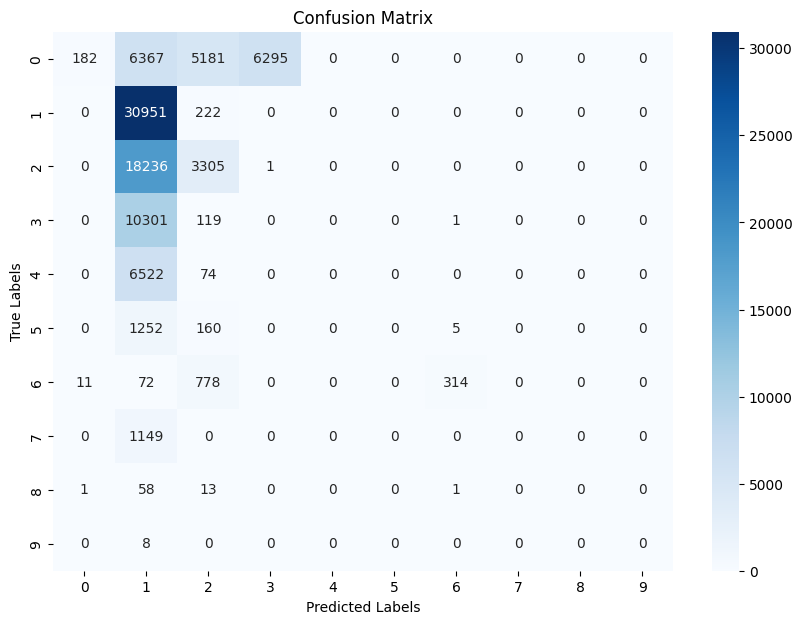

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9474    0.0100    0.0198      3599
           1     0.4108    0.9923    0.5811      6381
           2     0.3419    0.1523    0.2107      4433
           3     0.0000    0.0000    0.0000      2153
           4     0.0000    0.0000    0.0000      1374
           5     0.0000    0.0000    0.0000       314
           6     0.9815    0.2218    0.3618       239
           7     0.0000    0.0000    0.0000       237
           8     0.0000    0.0000    0.0000        25
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.3783     18758
   macro avg     0.2682    0.1376    0.1173     18758
weighted avg     0.4148    0.3783    0.2559     18758



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


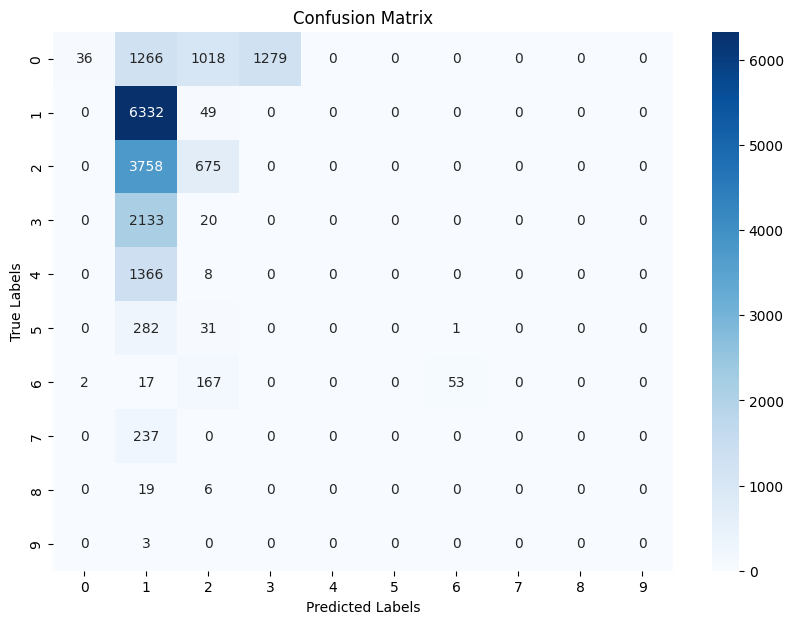

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9412    0.0089    0.0176      5403
           1     0.4080    0.9920    0.5782      9299
           2     0.3325    0.1470    0.2039      6659
           3     0.0000    0.0000    0.0000      3055
           4     0.0000    0.0000    0.0000      2024
           5     0.0000    0.0000    0.0000       415
           6     0.9669    0.3277    0.4895       357
           7     0.0000    0.0000    0.0000       338
           8     0.0000    0.0000    0.0000        31
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.3759     27584
   macro avg     0.2649    0.1476    0.1289     27584
weighted avg     0.4147    0.3759    0.2539     27584



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


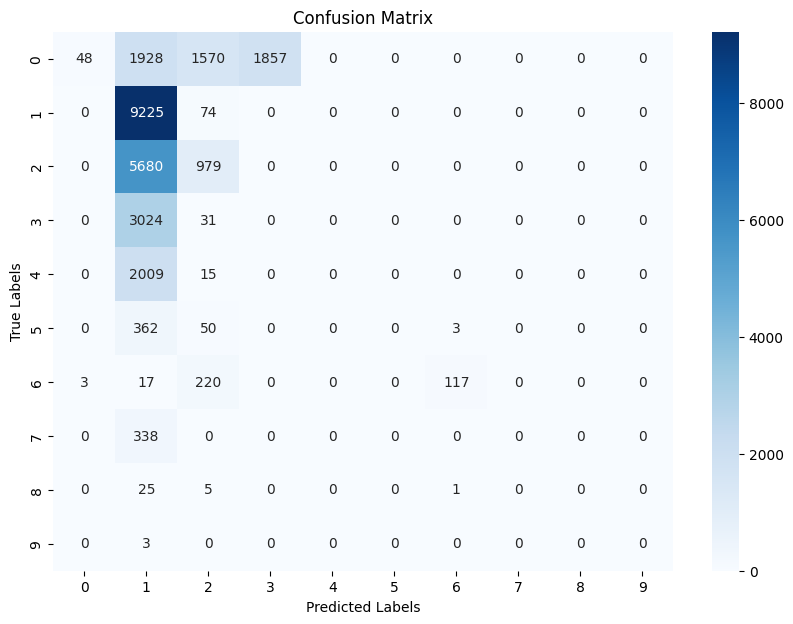

Start Round 2 ...
client_0: Loss = 0.607, Accuracy = 0.759
client_1: Loss = 0.6191, Accuracy = 0.7524
client_2: Loss = 0.5792, Accuracy = 0.7662
client_3: Loss = 0.6318, Accuracy = 0.7493
client_4: Loss = 0.5863, Accuracy = 0.7589
After round 2, train_loss = 0.7089, train_acc = 0.7280, dev_loss = 0.7257, dev_acc = 0.7251, test_loss = 0.7237, test_acc = 0.7242
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9992    0.9503    0.9742     18025
           1     0.7574    0.7516    0.7545     31173
           2     0.8015    0.8041    0.8028     21542
           3     0.3897    0.6447    0.4858     10421
           4     0.3786    0.0981    0.1558      6596
           5     0.1628    0.2025    0.1805      1417
           6     0.0000    0.0000    0.0000      1175
           7     0.9685    0.9904    0.9793      1149
           8     0.0000    0.0000    0.0000        73
           9     0.0000    0.0000    0.0000         8

   

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


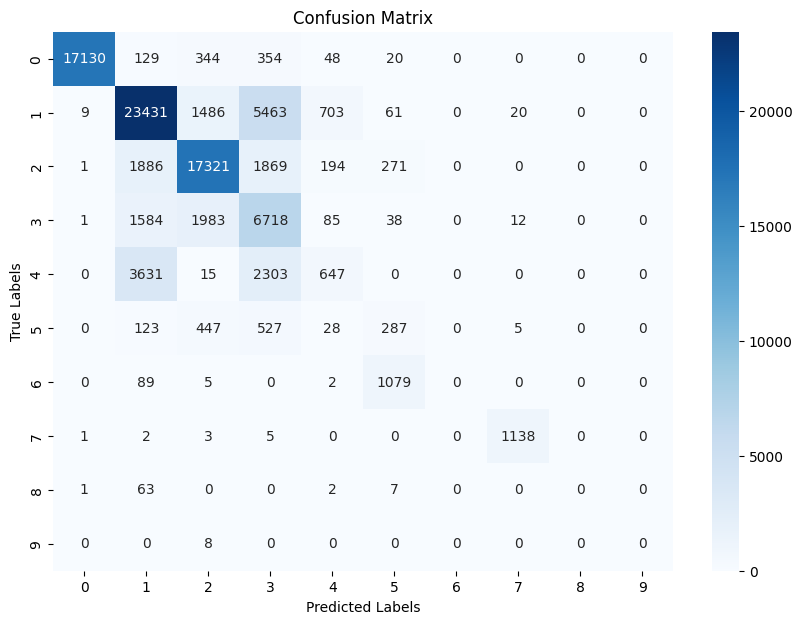

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9997    0.9511    0.9748      3599
           1     0.7507    0.7446    0.7476      6381
           2     0.7971    0.8119    0.8044      4433
           3     0.3964    0.6582    0.4948      2153
           4     0.3671    0.0844    0.1373      1374
           5     0.1657    0.1911    0.1775       314
           6     0.0000    0.0000    0.0000       239
           7     0.9831    0.9831    0.9831       237
           8     0.0000    0.0000    0.0000        25
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7250     18758
   macro avg     0.4460    0.4424    0.4320     18758
weighted avg     0.7231    0.7250    0.7137     18758



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


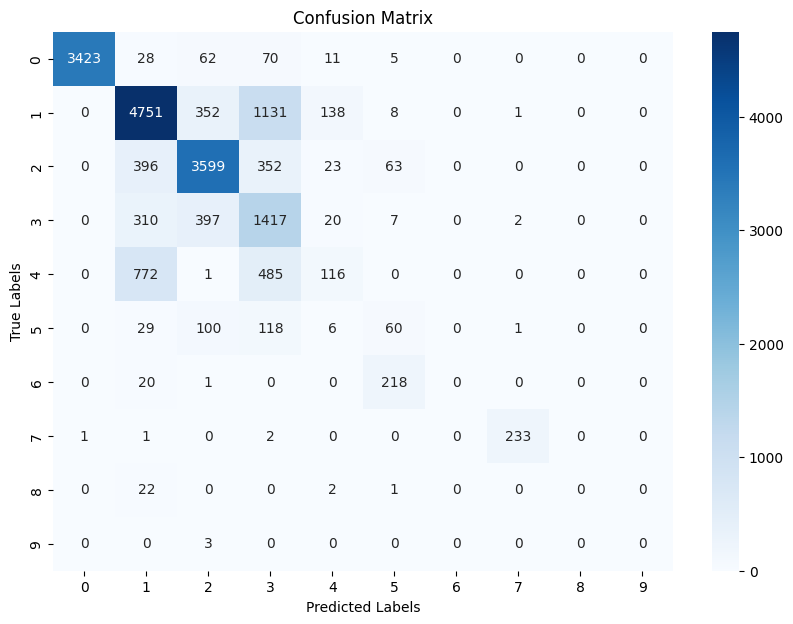

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9992    0.9482    0.9730      5403
           1     0.7549    0.7464    0.7507      9299
           2     0.8003    0.8064    0.8034      6659
           3     0.3823    0.6445    0.4799      3055
           4     0.3692    0.0949    0.1509      2024
           5     0.1347    0.1759    0.1526       415
           6     0.0000    0.0000    0.0000       357
           7     0.9706    0.9763    0.9735       338
           8     0.0000    0.0000    0.0000        31
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7250     27584
   macro avg     0.4411    0.4393    0.4284     27584
weighted avg     0.7268    0.7250    0.7160     27584



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


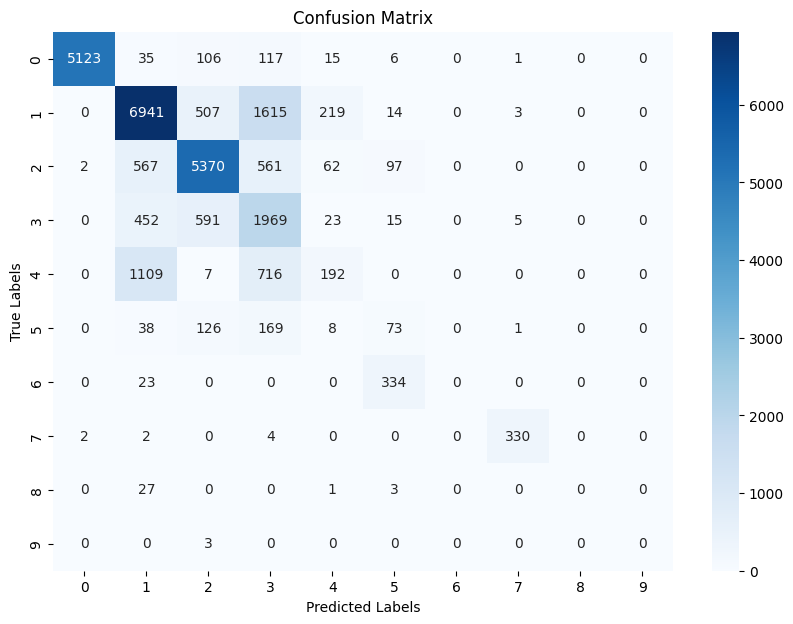

Start Round 3 ...
client_0: Loss = 0.5262, Accuracy = 0.7816
client_1: Loss = 0.5327, Accuracy = 0.7728
client_2: Loss = 0.6224, Accuracy = 0.759
client_3: Loss = 0.5365, Accuracy = 0.777
client_4: Loss = 0.5304, Accuracy = 0.7773
After round 3, train_loss = 0.5079, train_acc = 0.7889, dev_loss = 0.5213, dev_acc = 0.7859, test_loss = 0.5161, test_acc = 0.7872
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9923    0.9978    0.9950     18025
           1     0.7505    0.8359    0.7909     31173
           2     0.9052    0.7769    0.8361     21542
           3     0.5129    0.5707    0.5402     10421
           4     0.5274    0.4706    0.4974      6596
           5     0.4036    0.0797    0.1332      1417
           6     0.8610    0.9915    0.9217      1175
           7     1.0000    0.9878    0.9939      1149
           8     0.0000    0.0000    0.0000        73
           9     0.0000    0.0000    0.0000         8

   

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


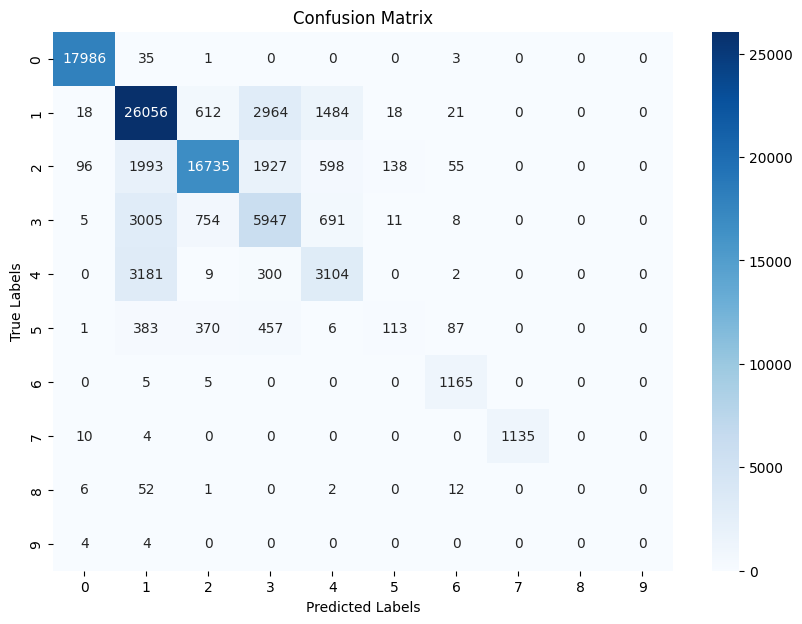

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9903    0.9958    0.9931      3599
           1     0.7441    0.8350    0.7869      6381
           2     0.9004    0.7871    0.8399      4433
           3     0.5187    0.5601    0.5386      2153
           4     0.5256    0.4636    0.4927      1374
           5     0.4000    0.0828    0.1372       314
           6     0.8848    0.9958    0.9370       239
           7     1.0000    0.9831    0.9915       237
           8     0.0000    0.0000    0.0000        25
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7859     18758
   macro avg     0.5964    0.5703    0.5717     18758
weighted avg     0.7846    0.7859    0.7814     18758



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


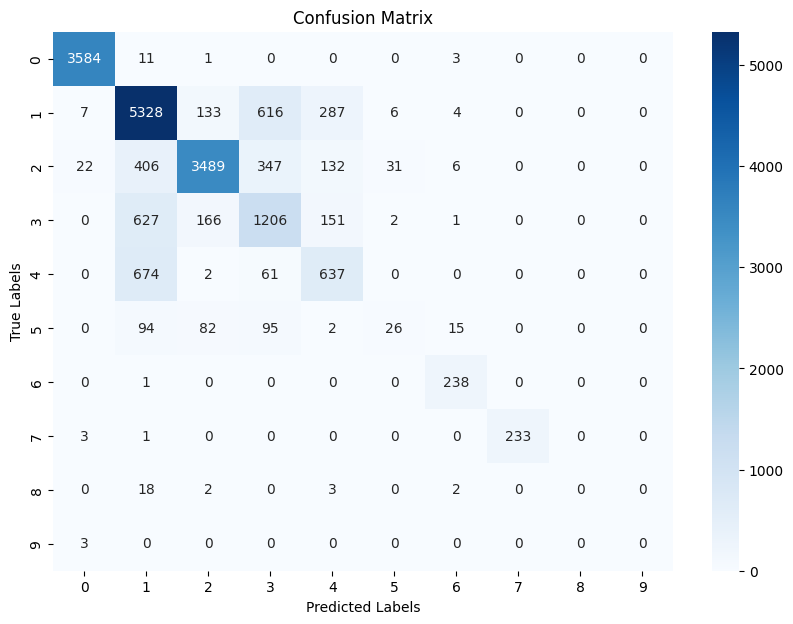

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9914    0.9978    0.9946      5403
           1     0.7470    0.8311    0.7868      9299
           2     0.9069    0.7853    0.8417      6659
           3     0.5023    0.5696    0.5338      3055
           4     0.5350    0.4639    0.4970      2024
           5     0.3714    0.0627    0.1072       415
           6     0.8582    1.0000    0.9237       357
           7     0.9970    0.9704    0.9835       338
           8     0.0000    0.0000    0.0000        31
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7881     27584
   macro avg     0.5909    0.5681    0.5668     27584
weighted avg     0.7887    0.7881    0.7844     27584



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


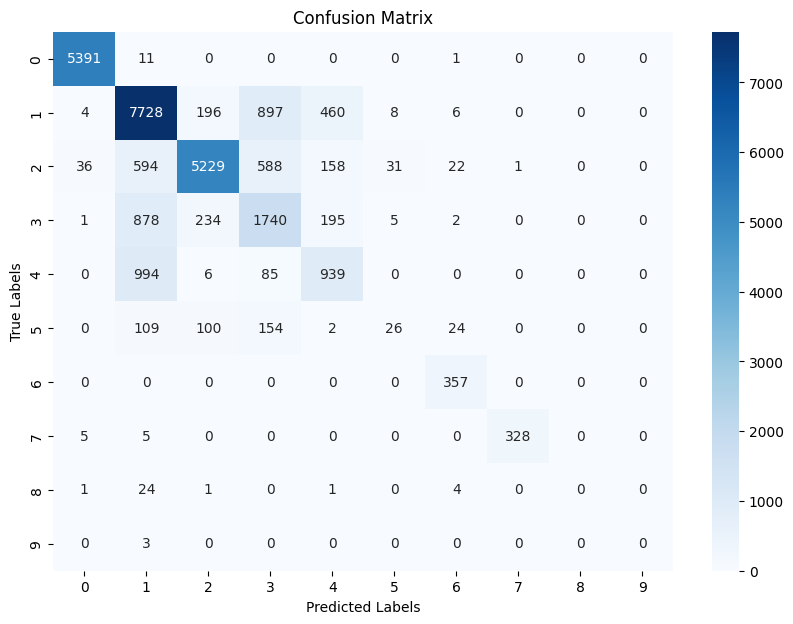

Start Round 4 ...
client_0: Loss = 0.5012, Accuracy = 0.7908
client_1: Loss = 0.5059, Accuracy = 0.7855
client_2: Loss = 0.494, Accuracy = 0.7917
client_3: Loss = 0.5841, Accuracy = 0.7657
client_4: Loss = 0.5993, Accuracy = 0.7603
After round 4, train_loss = 0.6158, train_acc = 0.7532, dev_loss = 0.6375, dev_acc = 0.7455, test_loss = 0.6194, test_acc = 0.7537
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9576    0.9951    0.9760     18025
           1     0.8354    0.6587    0.7366     31173
           2     0.7962    0.8445    0.8196     21542
           3     0.5292    0.4961    0.5121     10421
           4     0.4036    0.8643    0.5503      6596
           5     0.0000    0.0000    0.0000      1417
           6     0.9524    0.8860    0.9180      1175
           7     0.9259    0.3481    0.5060      1149
           8     0.0000    0.0000    0.0000        73
           9     0.0000    0.0000    0.0000         8

  

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


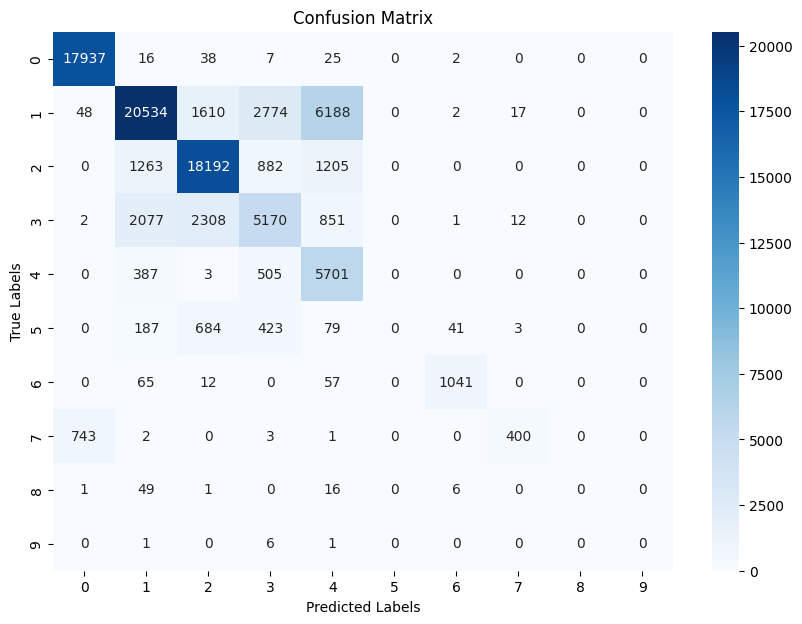

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9559    0.9936    0.9744      3599
           1     0.8283    0.6466    0.7263      6381
           2     0.7882    0.8498    0.8178      4433
           3     0.5404    0.4937    0.5160      2153
           4     0.3906    0.8486    0.5350      1374
           5     0.0000    0.0000    0.0000       314
           6     0.9452    0.8661    0.9039       239
           7     0.9419    0.3418    0.5015       237
           8     0.0000    0.0000    0.0000        25
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7456     18758
   macro avg     0.5391    0.5040    0.4975     18758
weighted avg     0.7661    0.7456    0.7436     18758



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


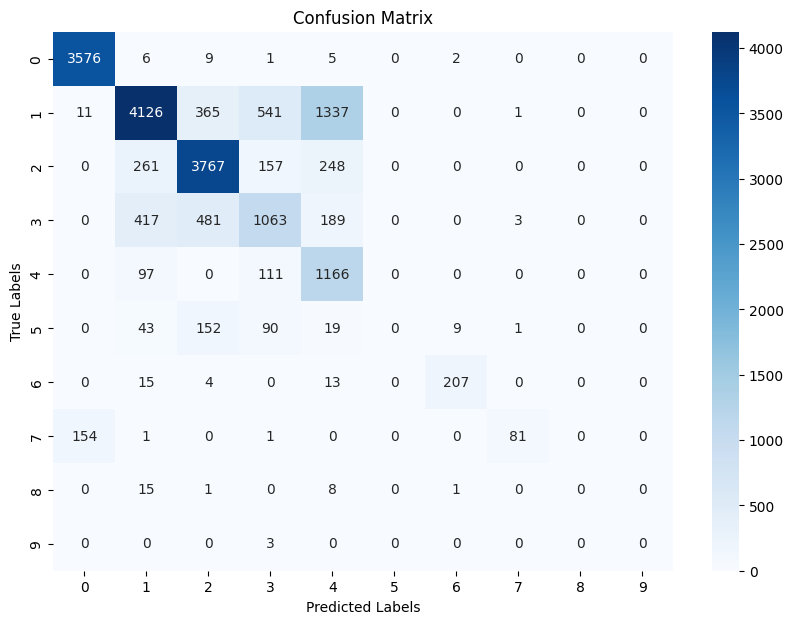

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9621    0.9948    0.9782      5403
           1     0.8305    0.6529    0.7310      9299
           2     0.7967    0.8527    0.8237      6659
           3     0.5278    0.4907    0.5086      3055
           4     0.4127    0.8666    0.5591      2024
           5     0.0000    0.0000    0.0000       415
           6     0.9582    0.8992    0.9277       357
           7     0.9407    0.3757    0.5370       338
           8     0.0000    0.0000    0.0000        31
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7550     27584
   macro avg     0.5429    0.5133    0.5065     27584
weighted avg     0.7734    0.7550    0.7528     27584



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


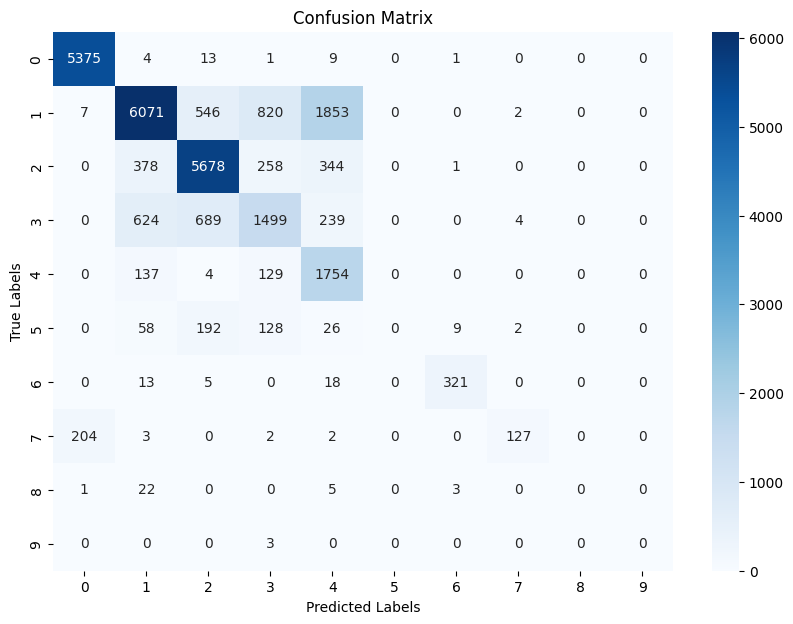

Start Round 5 ...
client_0: Loss = 0.4997, Accuracy = 0.7906
client_1: Loss = 0.5103, Accuracy = 0.7858
client_2: Loss = 0.5022, Accuracy = 0.7895
client_3: Loss = 0.526, Accuracy = 0.7837
client_4: Loss = 0.5084, Accuracy = 0.7856
After round 5, train_loss = 0.5479, train_acc = 0.7809, dev_loss = 0.5622, dev_acc = 0.7776, test_loss = 0.5580, test_acc = 0.7752
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9974    0.9976    0.9975     18025
           1     0.7884    0.8078    0.7980     31173
           2     0.9526    0.7021    0.8084     21542
           3     0.4994    0.6699    0.5722     10421
           4     0.5461    0.5249    0.5353      6596
           5     0.1636    0.3380    0.2205      1417
           6     0.8785    0.9906    0.9312      1175
           7     0.9802    0.9904    0.9853      1149
           8     0.8000    0.0548    0.1026        73
           9     0.0000    0.0000    0.0000         8

  

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


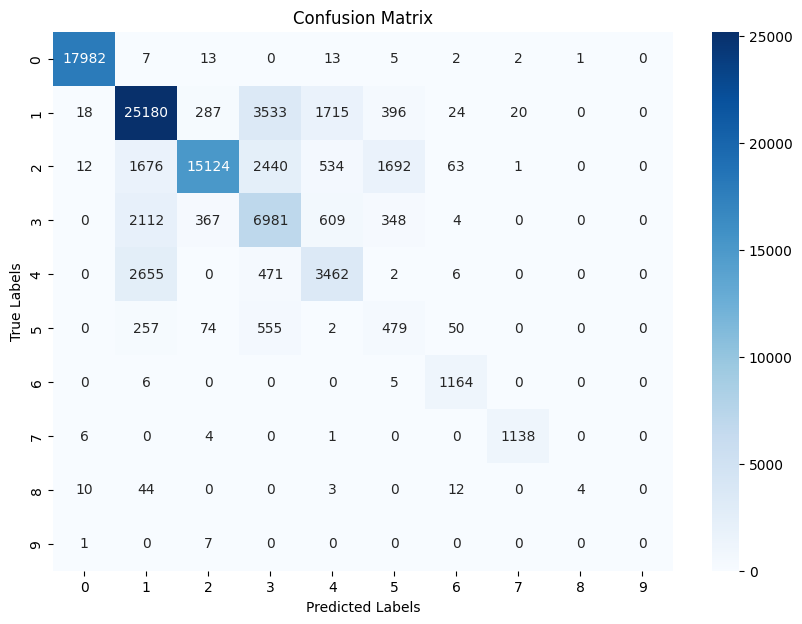

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9972    0.9964    0.9968      3599
           1     0.7805    0.8018    0.7910      6381
           2     0.9535    0.7122    0.8153      4433
           3     0.5021    0.6716    0.5746      2153
           4     0.5519    0.5109    0.5306      1374
           5     0.1674    0.3408    0.2246       314
           6     0.8939    0.9874    0.9384       239
           7     0.9749    0.9831    0.9790       237
           8     1.0000    0.0800    0.1481        25
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7775     18758
   macro avg     0.6821    0.6084    0.5998     18758
weighted avg     0.8081    0.7775    0.7861     18758



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


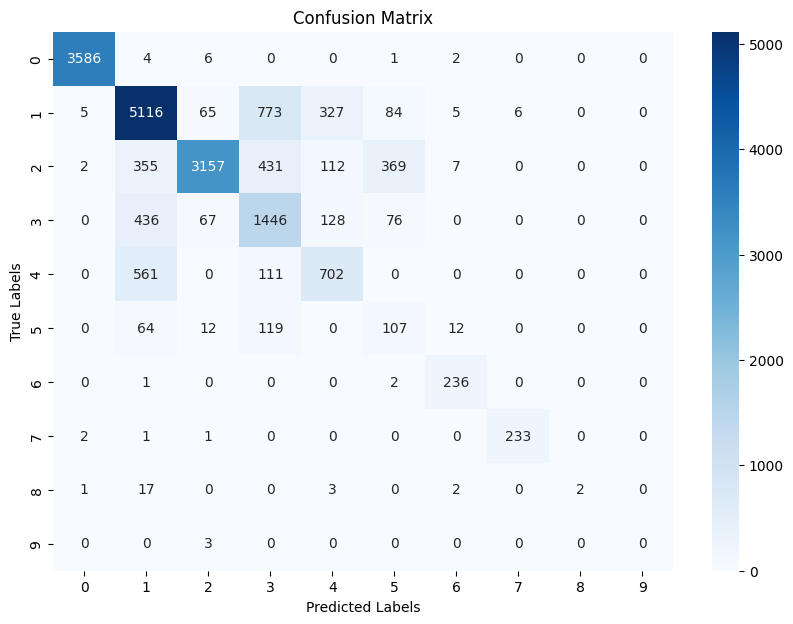

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9981    0.9972    0.9977      5403
           1     0.7781    0.8008    0.7893      9299
           2     0.9523    0.7051    0.8103      6659
           3     0.4886    0.6681    0.5644      3055
           4     0.5530    0.5079    0.5295      2024
           5     0.1378    0.3012    0.1891       415
           6     0.8698    0.9916    0.9267       357
           7     0.9851    0.9763    0.9807       338
           8     0.0000    0.0000    0.0000        31
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7761     27584
   macro avg     0.5763    0.5948    0.5788     27584
weighted avg     0.8078    0.7761    0.7853     27584



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


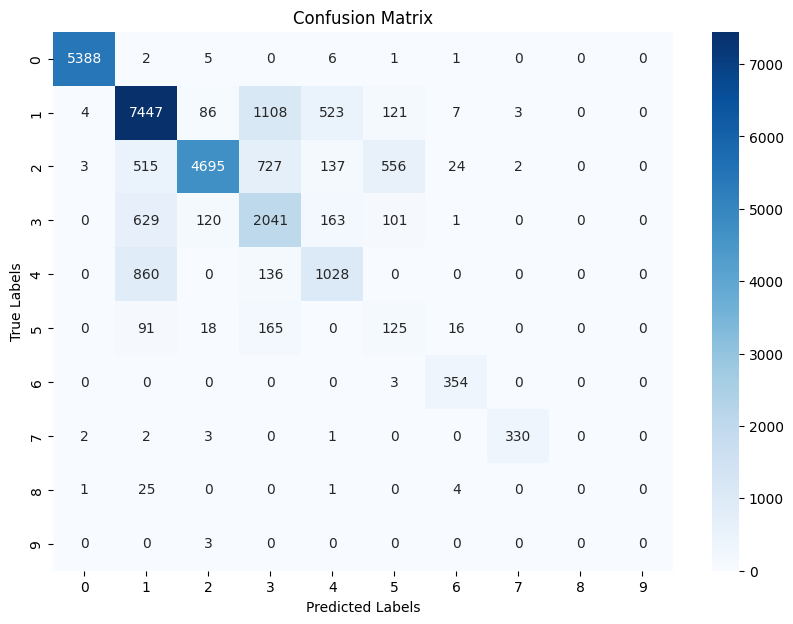

Start Round 6 ...
client_0: Loss = 0.481, Accuracy = 0.7968
client_1: Loss = 0.496, Accuracy = 0.7879
client_2: Loss = 0.4816, Accuracy = 0.7974
client_3: Loss = 0.4938, Accuracy = 0.7916
client_4: Loss = 0.4913, Accuracy = 0.7899
After round 6, train_loss = 0.5386, train_acc = 0.7826, dev_loss = 0.5553, dev_acc = 0.7789, test_loss = 0.5440, test_acc = 0.7782
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9987    0.9972    0.9979     18025
           1     0.9045    0.6947    0.7859     31173
           2     0.9650    0.7209    0.8253     21542
           3     0.4210    0.8567    0.5645     10421
           4     0.5392    0.7623    0.6316      6596
           5     0.4539    0.1807    0.2585      1417
           6     0.9009    0.9898    0.9432      1175
           7     0.9792    0.9843    0.9818      1149
           8     0.5000    0.0137    0.0267        73
           9     0.0000    0.0000    0.0000         8

   

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


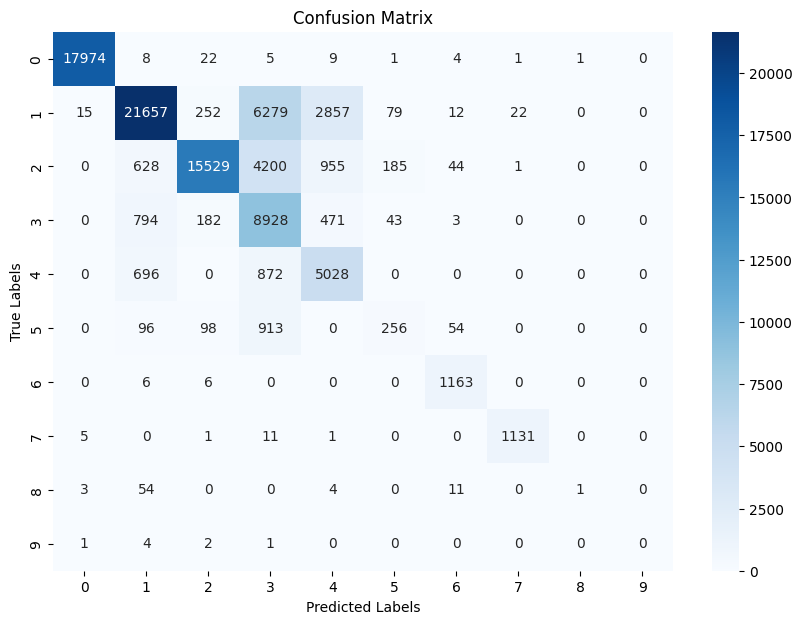

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9978    0.9956    0.9967      3599
           1     0.9003    0.6875    0.7796      6381
           2     0.9635    0.7318    0.8318      4433
           3     0.4193    0.8588    0.5635      2153
           4     0.5393    0.7445    0.6255      1374
           5     0.4583    0.1752    0.2535       314
           6     0.9119    0.9958    0.9520       239
           7     0.9665    0.9747    0.9706       237
           8     0.0000    0.0000    0.0000        25
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7789     18758
   macro avg     0.6157    0.6164    0.5973     18758
weighted avg     0.8445    0.7789    0.7921     18758



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


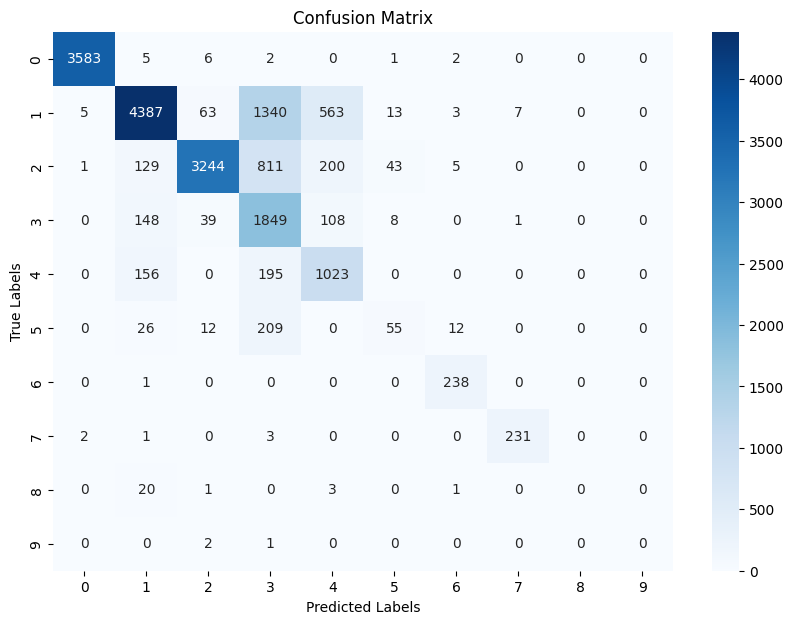

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9989    0.9972    0.9981      5403
           1     0.9000    0.6870    0.7792      9299
           2     0.9656    0.7241    0.8276      6659
           3     0.4085    0.8553    0.5530      3055
           4     0.5502    0.7638    0.6396      2024
           5     0.3399    0.1253    0.1831       415
           6     0.8837    1.0000    0.9382       357
           7     0.9701    0.9586    0.9643       338
           8     1.0000    0.0323    0.0625        31
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7791     27584
   macro avg     0.7017    0.6144    0.5946     27584
weighted avg     0.8473    0.7791    0.7929     27584



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


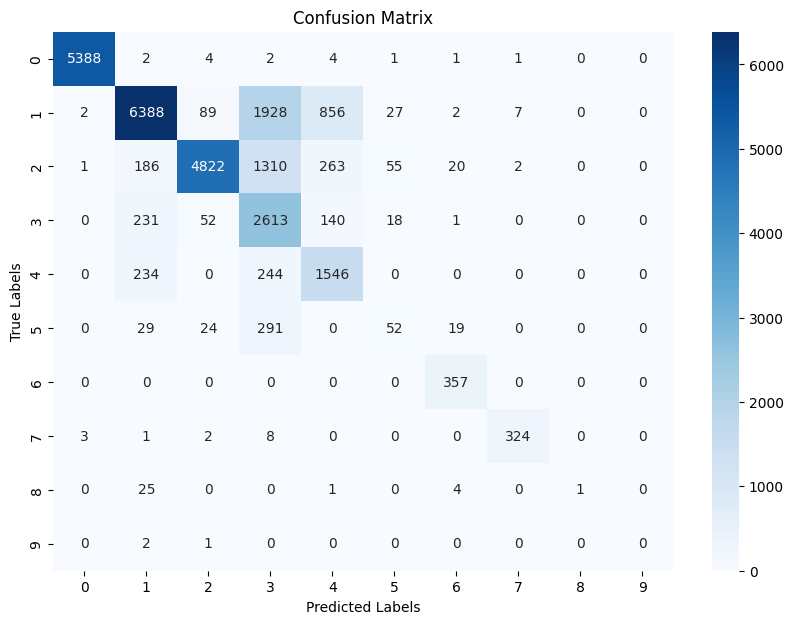

Start Round 7 ...
client_0: Loss = 0.4656, Accuracy = 0.8037
client_1: Loss = 0.4711, Accuracy = 0.7959
client_2: Loss = 0.4647, Accuracy = 0.8008
client_3: Loss = 0.4847, Accuracy = 0.797
client_4: Loss = 0.4691, Accuracy = 0.7998
After round 7, train_loss = 0.4537, train_acc = 0.7897, dev_loss = 0.4672, dev_acc = 0.7859, test_loss = 0.4619, test_acc = 0.7892
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9988    0.9974    0.9981     18025
           1     0.7090    0.8931    0.7905     31173
           2     0.8492    0.8302    0.8396     21542
           3     0.5555    0.3797    0.4511     10421
           4     0.6365    0.3428    0.4456      6596
           5     0.6463    0.0670    0.1215      1417
           6     0.9005    0.9855    0.9411      1175
           7     0.9991    0.9913    0.9952      1149
           8     0.8000    0.0548    0.1026        73
           9     0.0000    0.0000    0.0000         8

  

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


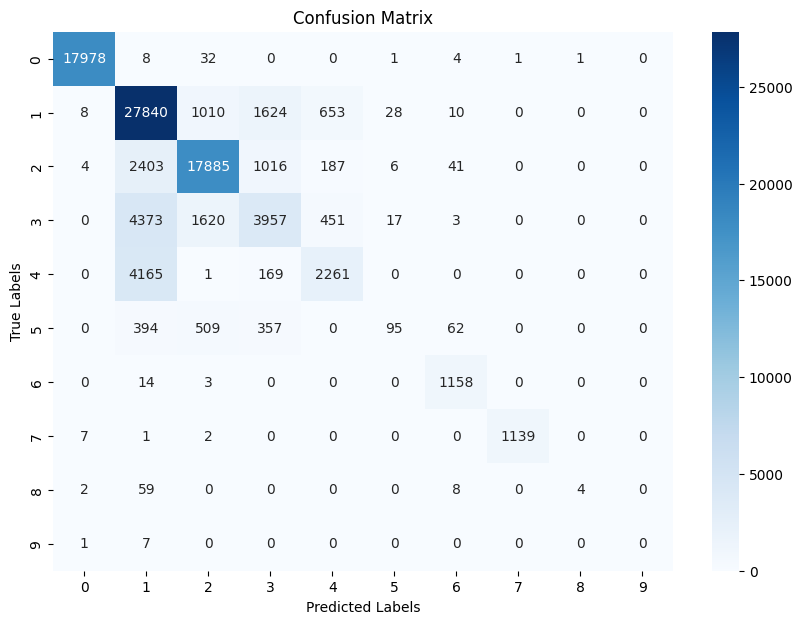

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9981    0.9969    0.9975      3599
           1     0.7012    0.8914    0.7849      6381
           2     0.8462    0.8380    0.8421      4433
           3     0.5572    0.3781    0.4505      2153
           4     0.6499    0.3202    0.4291      1374
           5     0.8000    0.0764    0.1395       314
           6     0.9112    0.9874    0.9478       239
           7     1.0000    0.9831    0.9915       237
           8     1.0000    0.0400    0.0769        25
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7857     18758
   macro avg     0.7464    0.5512    0.5660     18758
weighted avg     0.7805    0.7857    0.7676     18758



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


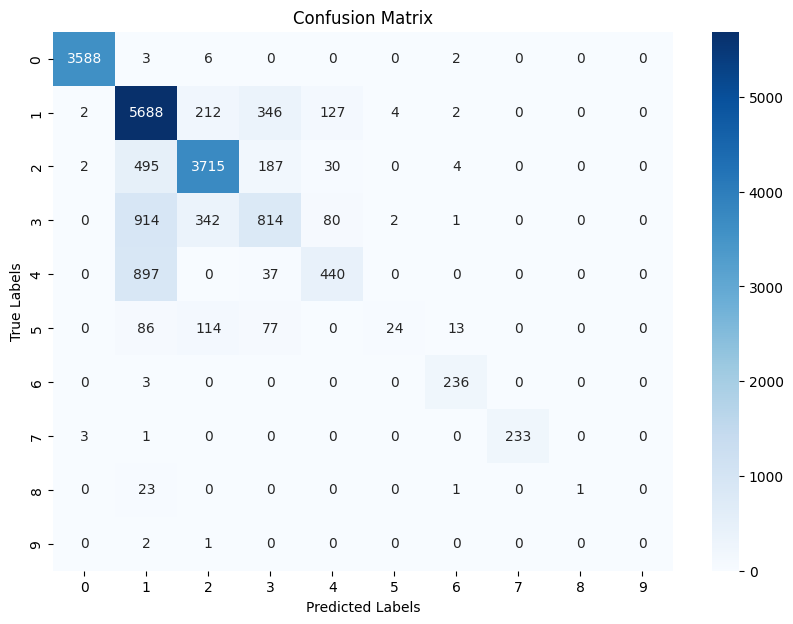

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9985    0.9978    0.9981      5403
           1     0.7045    0.8890    0.7861      9299
           2     0.8523    0.8420    0.8471      6659
           3     0.5586    0.3715    0.4462      3055
           4     0.6434    0.3370    0.4423      2024
           5     0.4898    0.0578    0.1034       415
           6     0.8942    0.9944    0.9416       357
           7     0.9940    0.9763    0.9851       338
           8     1.0000    0.0323    0.0625        31
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7900     27584
   macro avg     0.7135    0.5498    0.5613     27584
weighted avg     0.7801    0.7900    0.7728     27584



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


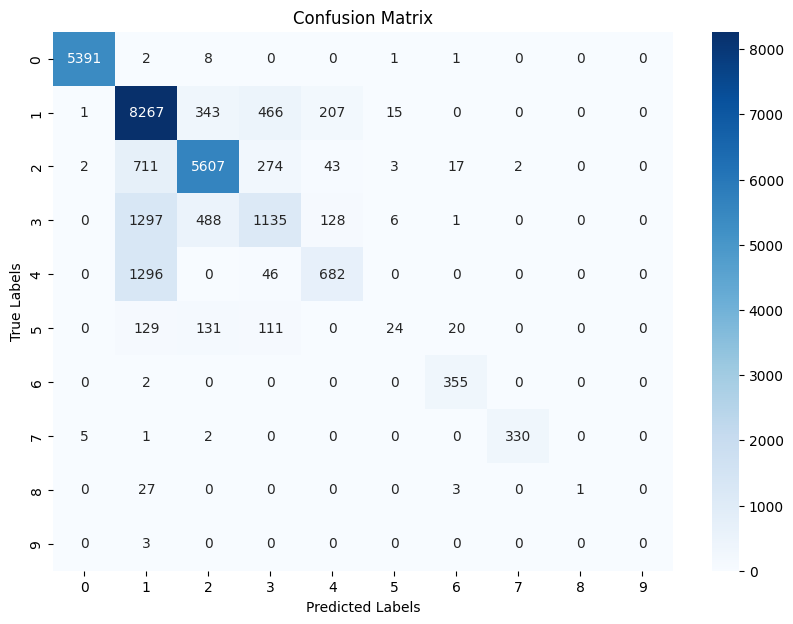

Start Round 8 ...
client_0: Loss = 0.4444, Accuracy = 0.8056
client_1: Loss = 0.4648, Accuracy = 0.7978
client_2: Loss = 0.4788, Accuracy = 0.7933
client_3: Loss = 0.4688, Accuracy = 0.7991
client_4: Loss = 0.4612, Accuracy = 0.7966
After round 8, train_loss = 0.4735, train_acc = 0.8024, dev_loss = 0.4850, dev_acc = 0.8023, test_loss = 0.4777, test_acc = 0.7985
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9965    0.9995    0.9980     18025
           1     0.8795    0.7421    0.8050     31173
           2     0.9168    0.7980    0.8533     21542
           3     0.4632    0.7862    0.5829     10421
           4     0.5798    0.6583    0.6165      6596
           5     0.3594    0.1722    0.2328      1417
           6     0.8432    0.9974    0.9138      1175
           7     0.9982    0.9922    0.9952      1149
           8     0.8070    0.6301    0.7077        73
           9     0.0000    0.0000    0.0000         8

 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


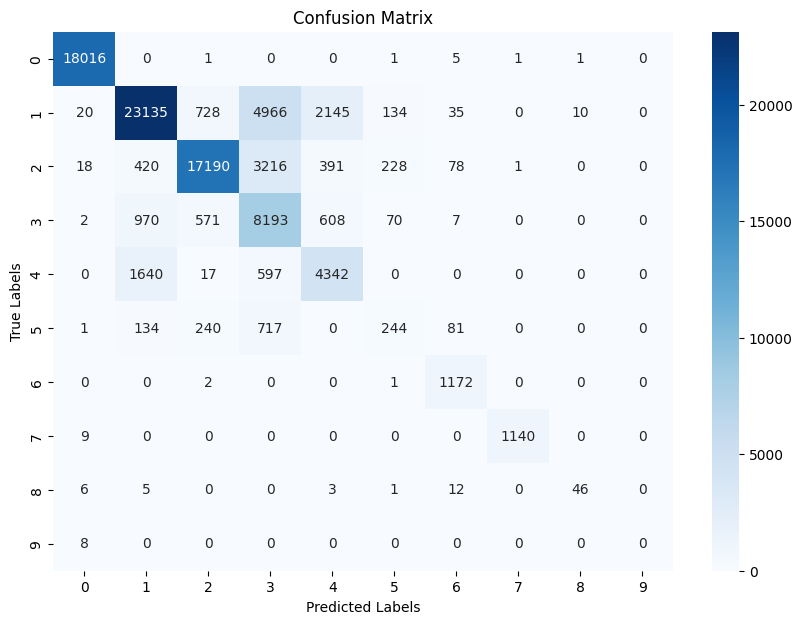

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9950    0.9981    0.9965      3599
           1     0.8745    0.7339    0.7981      6381
           2     0.9129    0.8184    0.8631      4433
           3     0.4711    0.7919    0.5908      2153
           4     0.5875    0.6521    0.6181      1374
           5     0.3904    0.1815    0.2478       314
           6     0.8530    0.9958    0.9189       239
           7     0.9957    0.9831    0.9894       237
           8     0.8125    0.5200    0.6341        25
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.8021     18758
   macro avg     0.6893    0.6675    0.6657     18758
weighted avg     0.8323    0.8021    0.8089     18758



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


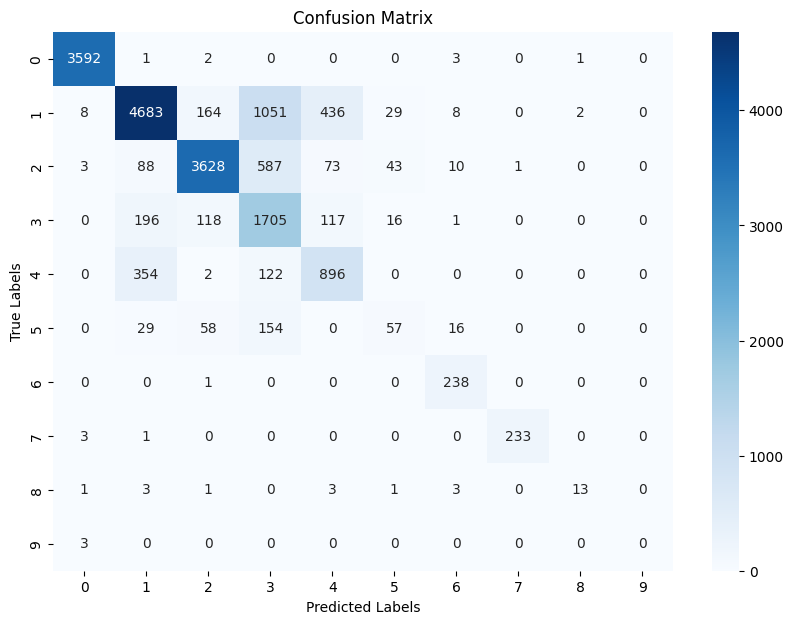

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9963    0.9996    0.9980      5403
           1     0.8737    0.7332    0.7973      9299
           2     0.9171    0.8070    0.8585      6659
           3     0.4509    0.7804    0.5716      3055
           4     0.5825    0.6472    0.6132      2024
           5     0.2932    0.1349    0.1848       415
           6     0.8361    1.0000    0.9107       357
           7     0.9940    0.9793    0.9866       338
           8     0.8333    0.3226    0.4651        31
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7991     27584
   macro avg     0.6777    0.6404    0.6386     27584
weighted avg     0.8321    0.7991    0.8070     27584



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


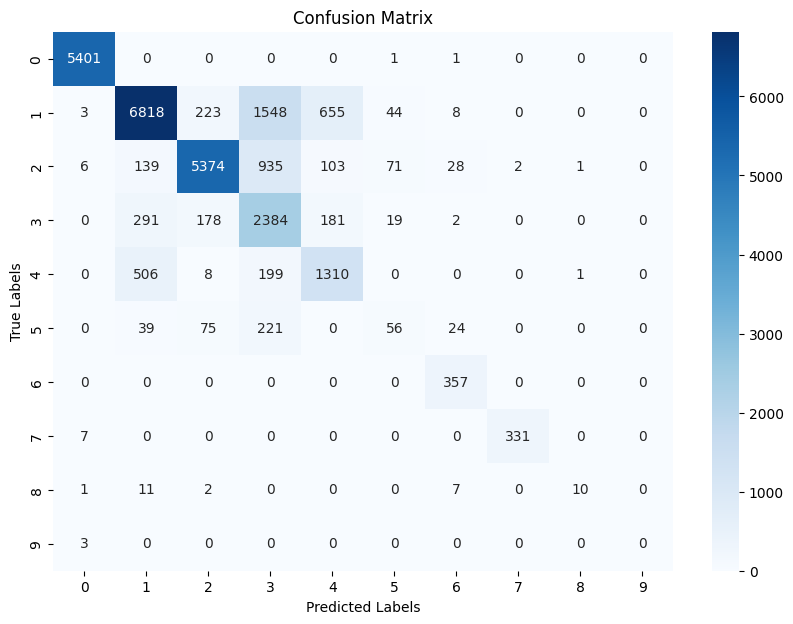

Start Round 9 ...
client_0: Loss = 0.4346, Accuracy = 0.8098
client_1: Loss = 0.4378, Accuracy = 0.8086
client_2: Loss = 0.4351, Accuracy = 0.8107
client_3: Loss = 0.4518, Accuracy = 0.8038
client_4: Loss = 0.4441, Accuracy = 0.8045
After round 9, train_loss = 0.4274, train_acc = 0.8159, dev_loss = 0.4427, dev_acc = 0.8119, test_loss = 0.4381, test_acc = 0.8086
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9993    0.9982    0.9987     18025
           1     0.8687    0.7908    0.8280     31173
           2     0.8406    0.8457    0.8431     21542
           3     0.5210    0.6390    0.5740     10421
           4     0.6098    0.6925    0.6485      6596
           5     0.3881    0.2449    0.3003      1417
           6     0.9372    0.9651    0.9509      1175
           7     1.0000    0.9922    0.9961      1149
           8     0.8889    0.1096    0.1951        73
           9     0.0000    0.0000    0.0000         8

 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


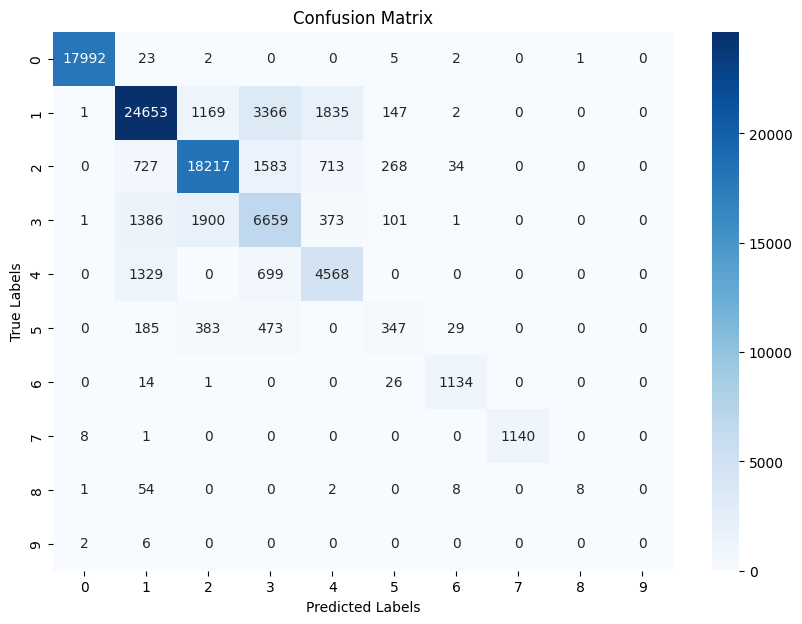

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9989    0.9956    0.9972      3599
           1     0.8615    0.7878    0.8230      6381
           2     0.8352    0.8507    0.8429      4433
           3     0.5210    0.6382    0.5737      2153
           4     0.6140    0.6783    0.6445      1374
           5     0.4176    0.2420    0.3065       314
           6     0.9237    0.9623    0.9426       239
           7     1.0000    0.9831    0.9915       237
           8     1.0000    0.0800    0.1481        25
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.8118     18758
   macro avg     0.7172    0.6218    0.6270     18758
weighted avg     0.8196    0.8118    0.8134     18758



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


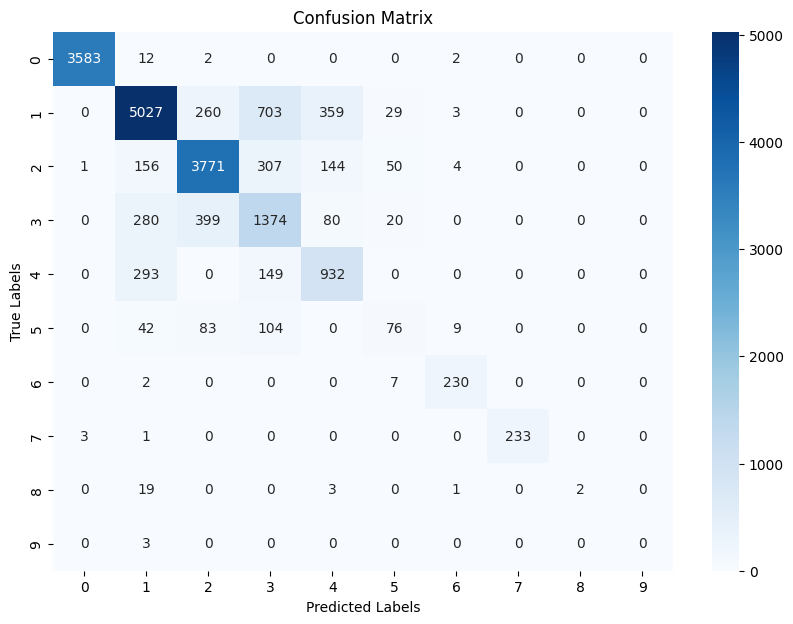

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9993    0.9978    0.9985      5403
           1     0.8565    0.7769    0.8148      9299
           2     0.8370    0.8519    0.8444      6659
           3     0.5041    0.6223    0.5570      3055
           4     0.6132    0.6813    0.6454      2024
           5     0.3399    0.2072    0.2575       415
           6     0.9328    0.9720    0.9520       357
           7     0.9970    0.9763    0.9865       338
           8     0.0000    0.0000    0.0000        31
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.8096     27584
   macro avg     0.6080    0.6086    0.6056     27584
weighted avg     0.8168    0.8096    0.8114     27584



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


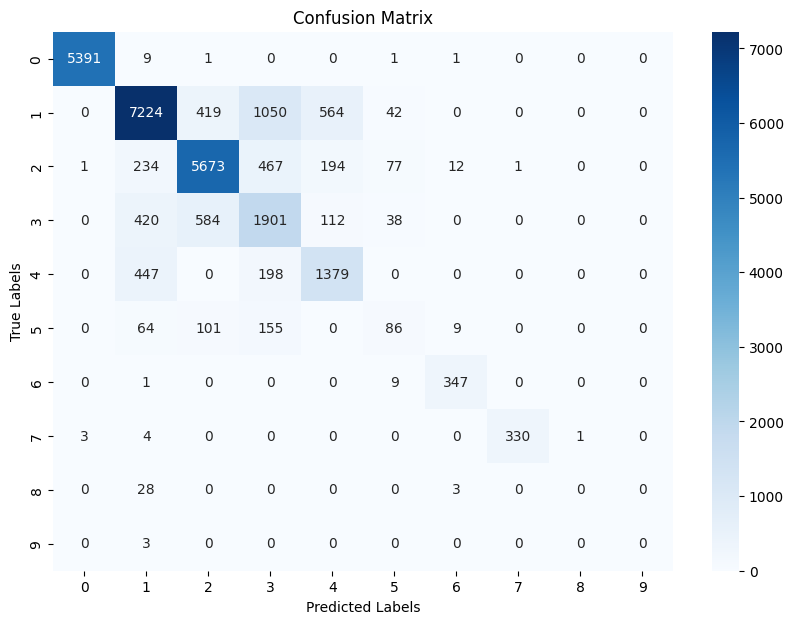

Start Round 10 ...
client_0: Loss = 0.4217, Accuracy = 0.8174
client_1: Loss = 0.4434, Accuracy = 0.808
client_2: Loss = 0.4246, Accuracy = 0.8156
client_3: Loss = 0.4361, Accuracy = 0.8117
client_4: Loss = 0.4271, Accuracy = 0.8109
After round 10, train_loss = 0.4403, train_acc = 0.8089, dev_loss = 0.4553, dev_acc = 0.8063, test_loss = 0.4463, test_acc = 0.8035
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9983    0.9994    0.9988     18025
           1     0.8258    0.7979    0.8116     31173
           2     0.9396    0.7800    0.8524     21542
           3     0.4783    0.8040    0.5998     10421
           4     0.6580    0.5347    0.5900      6596
           5     0.7529    0.0903    0.1613      1417
           6     0.8988    0.9906    0.9425      1175
           7     0.9991    0.9930    0.9961      1149
           8     0.8913    0.5616    0.6891        73
           9     0.0000    0.0000    0.0000         8



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


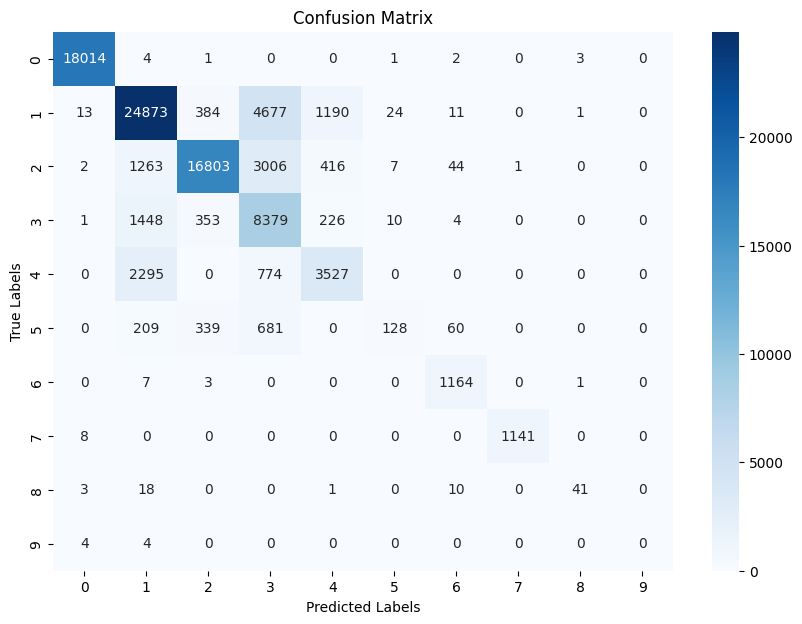

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9969    0.9981    0.9975      3599
           1     0.8211    0.7913    0.8059      6381
           2     0.9379    0.7972    0.8618      4433
           3     0.4801    0.8063    0.6018      2153
           4     0.6495    0.5058    0.5687      1374
           5     0.8333    0.1115    0.1966       314
           6     0.9119    0.9958    0.9520       239
           7     0.9957    0.9831    0.9894       237
           8     0.8667    0.5200    0.6500        25
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.8063     18758
   macro avg     0.7493    0.6509    0.6624     18758
weighted avg     0.8342    0.8063    0.8087     18758



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


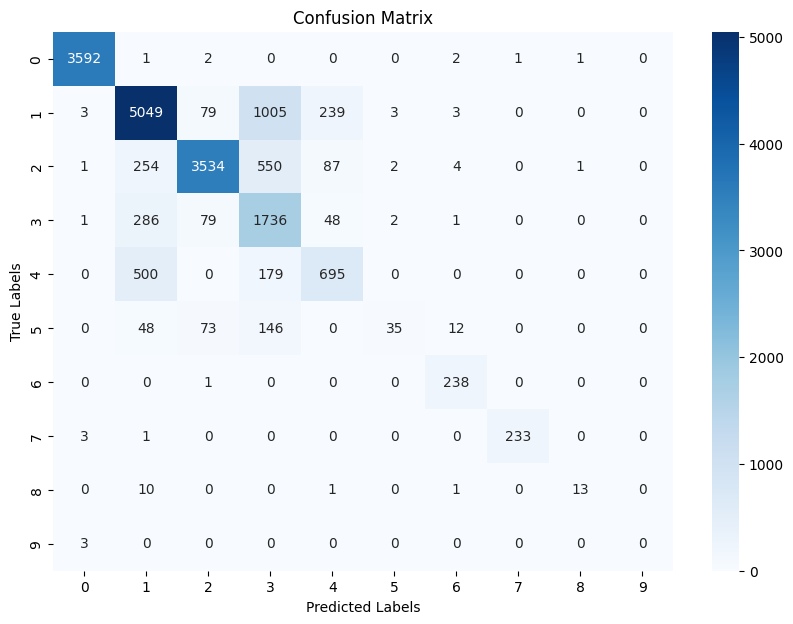

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9982    0.9989    0.9985      5403
           1     0.8176    0.7906    0.8039      9299
           2     0.9391    0.7871    0.8564      6659
           3     0.4629    0.7915    0.5841      3055
           4     0.6616    0.5178    0.5809      2024
           5     0.5490    0.0675    0.1202       415
           6     0.8925    1.0000    0.9432       357
           7     0.9940    0.9763    0.9851       338
           8     0.6923    0.2903    0.4091        31
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.8041     27584
   macro avg     0.7007    0.6220    0.6281     27584
weighted avg     0.8304    0.8041    0.8072     27584



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


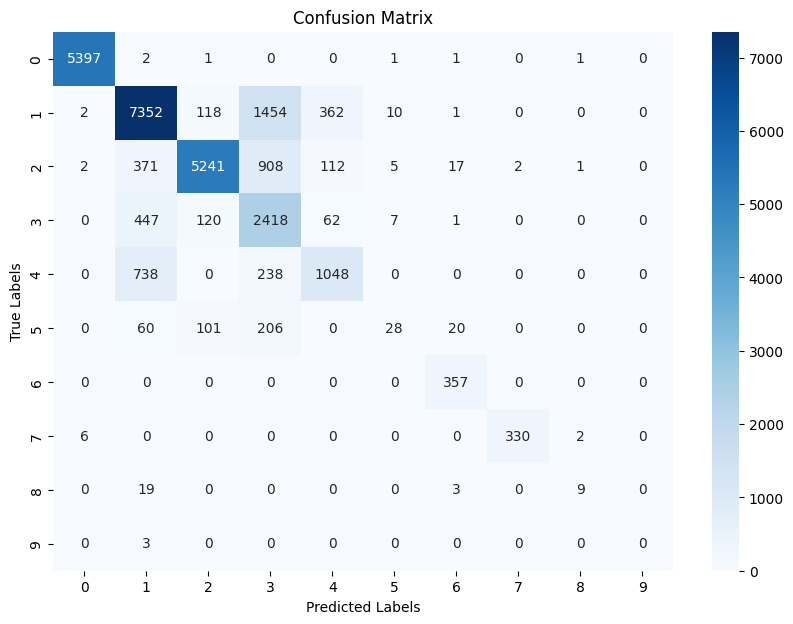

Start Round 11 ...
client_0: Loss = 0.4115, Accuracy = 0.8186
client_1: Loss = 0.4232, Accuracy = 0.8143
client_2: Loss = 0.4094, Accuracy = 0.8209
client_3: Loss = 0.4258, Accuracy = 0.8145
client_4: Loss = 0.4211, Accuracy = 0.8117
After round 11, train_loss = 0.4085, train_acc = 0.8231, dev_loss = 0.4275, dev_acc = 0.8171, test_loss = 0.4205, test_acc = 0.8197
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9993    0.9992    0.9992     18025
           1     0.8437    0.8143    0.8287     31173
           2     0.7790    0.9347    0.8498     21542
           3     0.6074    0.4259    0.5007     10421
           4     0.6604    0.7505    0.7026      6596
           5     0.4154    0.1560    0.2268      1417
           6     0.9543    0.9234    0.9386      1175
           7     1.0000    0.9922    0.9961      1149
           8     0.8889    0.1096    0.1951        73
           9     1.0000    0.2500    0.4000         8


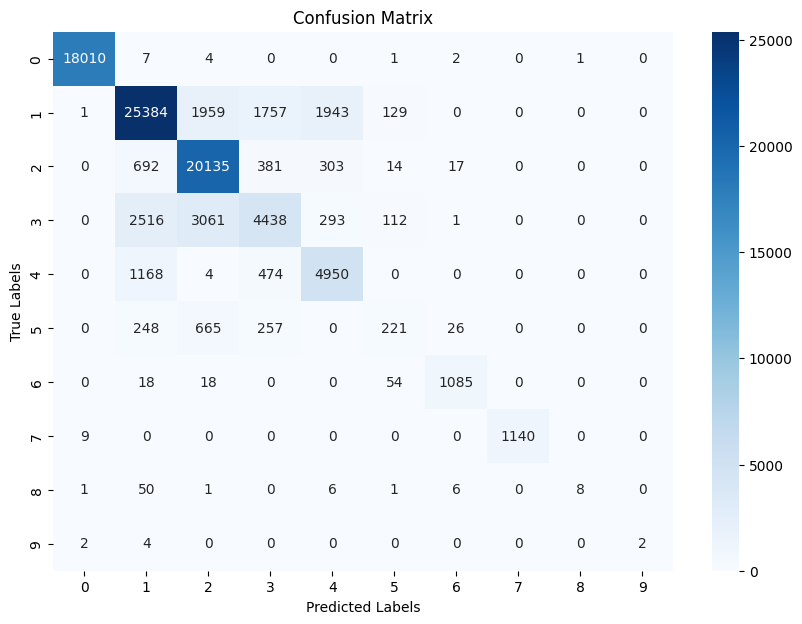

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9986    0.9967    0.9976      3599
           1     0.8385    0.8113    0.8247      6381
           2     0.7713    0.9337    0.8448      4433
           3     0.5973    0.4264    0.4976      2153
           4     0.6651    0.7329    0.6974      1374
           5     0.4151    0.1401    0.2095       314
           6     0.9485    0.9247    0.9364       239
           7     0.9957    0.9831    0.9894       237
           8     1.0000    0.0800    0.1481        25
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.8171     18758
   macro avg     0.7230    0.6029    0.6146     18758
weighted avg     0.8093    0.8171    0.8079     18758



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


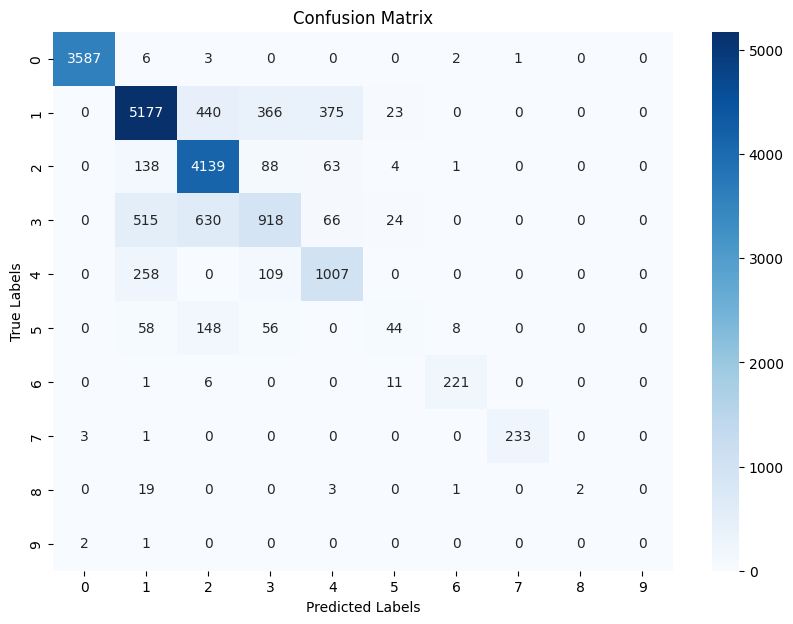

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9991    0.9980    0.9985      5403
           1     0.8348    0.8091    0.8218      9299
           2     0.7801    0.9320    0.8493      6659
           3     0.6038    0.4200    0.4954      3055
           4     0.6665    0.7456    0.7038      2024
           5     0.3931    0.1373    0.2036       415
           6     0.9463    0.9384    0.9423       357
           7     1.0000    0.9763    0.9880       338
           8     0.0000    0.0000    0.0000        31
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.8206     27584
   macro avg     0.6224    0.5957    0.6003     27584
weighted avg     0.8116    0.8206    0.8115     27584



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


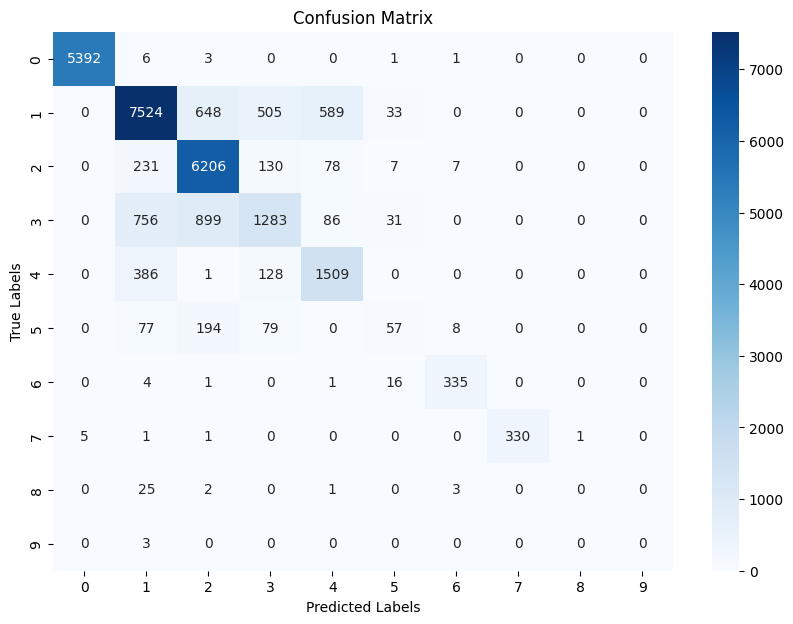

Start Round 12 ...
client_0: Loss = 0.3984, Accuracy = 0.8259
client_1: Loss = 0.4042, Accuracy = 0.8246
client_2: Loss = 0.4053, Accuracy = 0.825
client_3: Loss = 0.4347, Accuracy = 0.808
client_4: Loss = 0.4161, Accuracy = 0.8172
After round 12, train_loss = 0.4462, train_acc = 0.8106, dev_loss = 0.4622, dev_acc = 0.8066, test_loss = 0.4562, test_acc = 0.8058
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9994    0.9981    0.9988     18025
           1     0.8550    0.7976    0.8253     31173
           2     0.9248    0.7778    0.8450     21542
           3     0.4983    0.7681    0.6045     10421
           4     0.6168    0.6239    0.6203      6596
           5     0.2780    0.2032    0.2348      1417
           6     0.9119    0.8638    0.8872      1175
           7     1.0000    0.9930    0.9965      1149
           8     0.1486    0.7123    0.2459        73
           9     1.0000    0.6250    0.7692         8

 

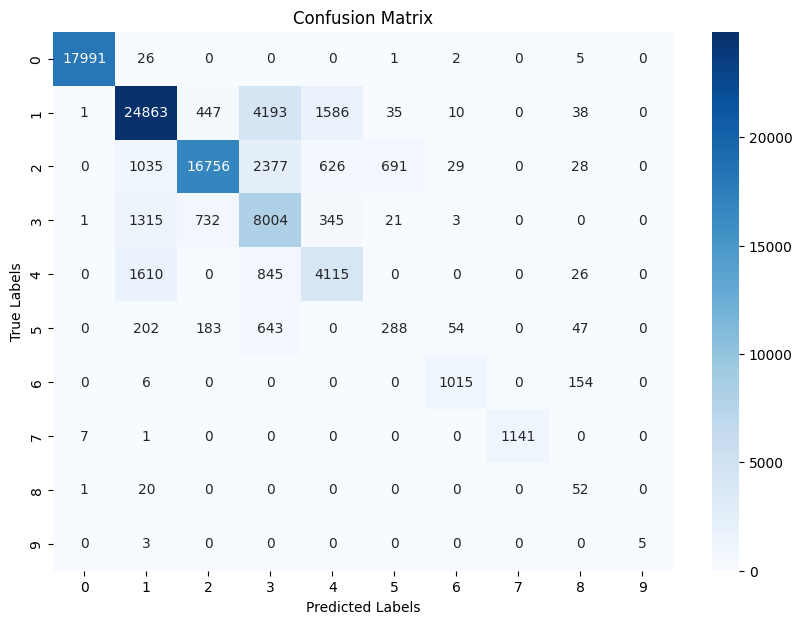

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9992    0.9964    0.9978      3599
           1     0.8482    0.7936    0.8200      6381
           2     0.9223    0.7814    0.8460      4433
           3     0.5018    0.7752    0.6092      2153
           4     0.6128    0.6012    0.6069      1374
           5     0.2681    0.2006    0.2295       314
           6     0.9244    0.8703    0.8966       239
           7     0.9957    0.9831    0.9894       237
           8     0.1918    0.5600    0.2857        25
           9     1.0000    0.6667    0.8000         3

    accuracy                         0.8065     18758
   macro avg     0.7264    0.7228    0.7081     18758
weighted avg     0.8300    0.8065    0.8130     18758



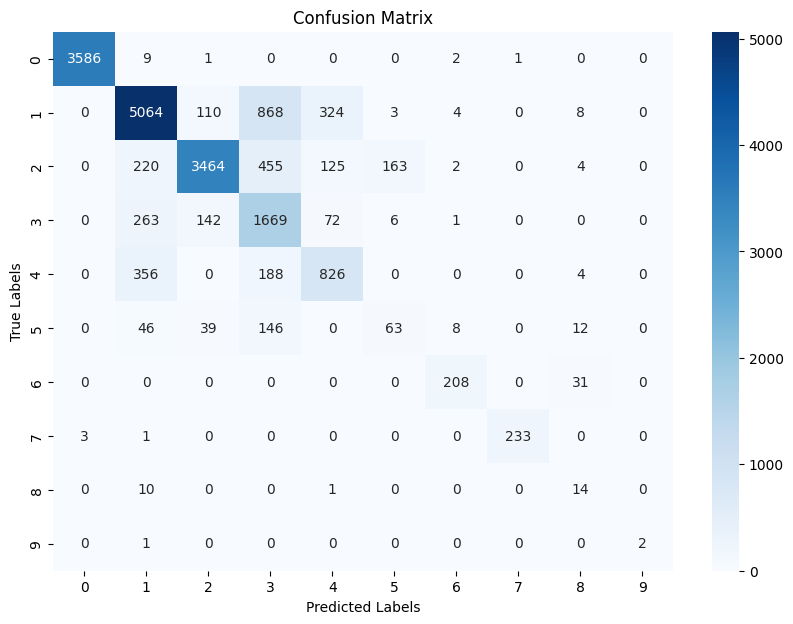

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9991    0.9972    0.9981      5403
           1     0.8492    0.7871    0.8169      9299
           2     0.9249    0.7881    0.8511      6659
           3     0.4828    0.7588    0.5901      3055
           4     0.6175    0.6166    0.6171      2024
           5     0.2475    0.1783    0.2073       415
           6     0.9147    0.8711    0.8924       357
           7     1.0000    0.9763    0.9880       338
           8     0.0755    0.2581    0.1168        31
           9     1.0000    0.3333    0.5000         3

    accuracy                         0.8064     27584
   macro avg     0.7111    0.6565    0.6578     27584
weighted avg     0.8320    0.8064    0.8140     27584



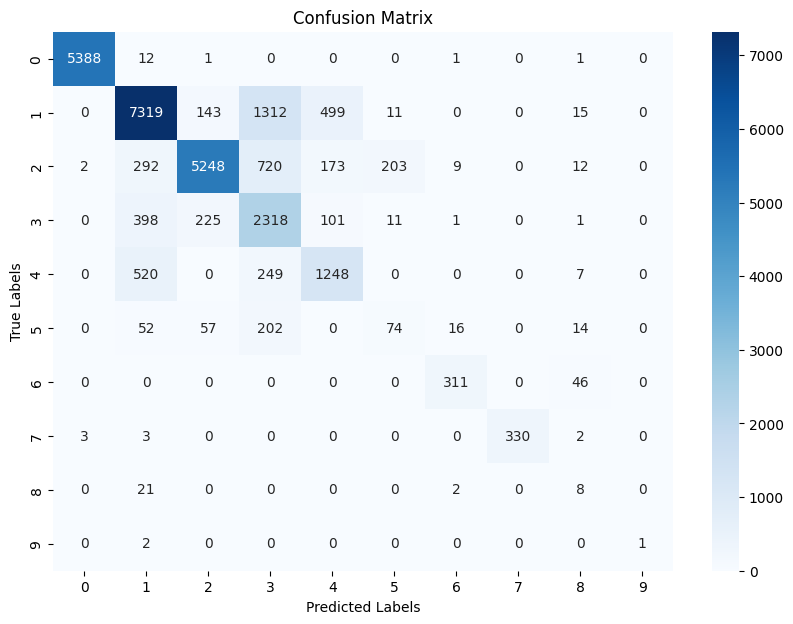

Start Round 13 ...
client_0: Loss = 0.4067, Accuracy = 0.8227
client_1: Loss = 0.3997, Accuracy = 0.8252
client_2: Loss = 0.3923, Accuracy = 0.8277
client_3: Loss = 0.4102, Accuracy = 0.8234
client_4: Loss = 0.4377, Accuracy = 0.8094
After round 13, train_loss = 0.4452, train_acc = 0.7974, dev_loss = 0.4652, dev_acc = 0.7924, test_loss = 0.4532, test_acc = 0.7924
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9996    0.9991    0.9993     18025
           1     0.7350    0.8809    0.8013     31173
           2     0.7637    0.9130    0.8317     21542
           3     0.6389    0.1796    0.2804     10421
           4     0.7298    0.5397    0.6205      6596
           5     0.7500    0.0550    0.1026      1417
           6     0.8812    0.9974    0.9357      1175
           7     0.9983    0.9956    0.9969      1149
           8     0.9107    0.6986    0.7907        73
           9     1.0000    0.7500    0.8571         8


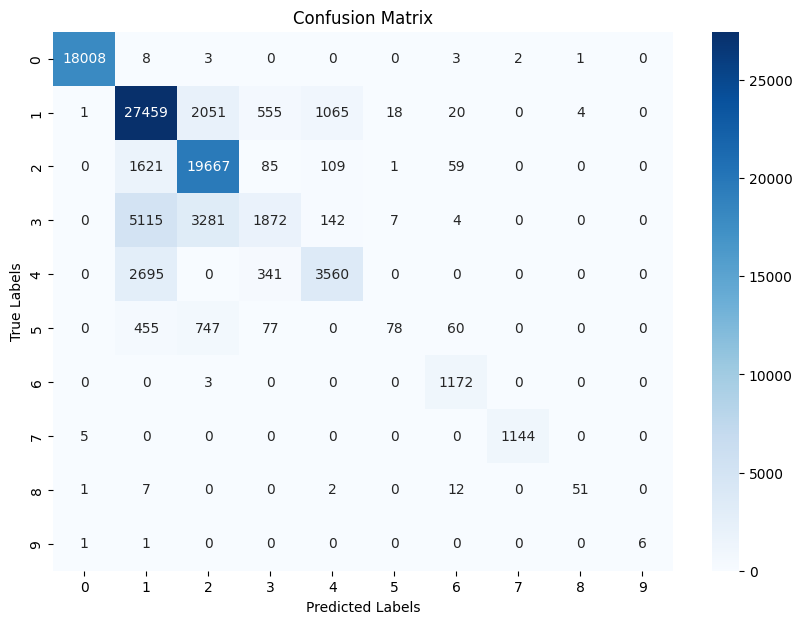

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9986    0.9964    0.9975      3599
           1     0.7269    0.8800    0.7961      6381
           2     0.7618    0.9113    0.8299      4433
           3     0.6406    0.1863    0.2886      2153
           4     0.7402    0.5204    0.6111      1374
           5     0.8400    0.0669    0.1239       314
           6     0.8848    0.9958    0.9370       239
           7     0.9915    0.9831    0.9873       237
           8     0.8824    0.6000    0.7143        25
           9     1.0000    0.3333    0.5000         3

    accuracy                         0.7925     18758
   macro avg     0.8467    0.6473    0.6786     18758
weighted avg     0.7858    0.7925    0.7637     18758



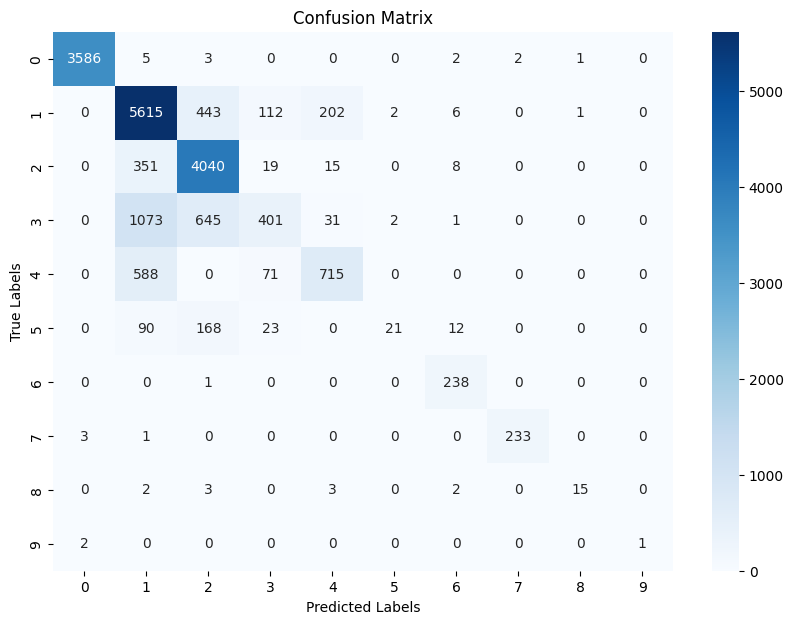

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9991    0.9985    0.9988      5403
           1     0.7262    0.8711    0.7921      9299
           2     0.7639    0.9137    0.8321      6659
           3     0.6235    0.1751    0.2734      3055
           4     0.7278    0.5059    0.5969      2024
           5     0.6286    0.0530    0.0978       415
           6     0.8602    1.0000    0.9249       357
           7     1.0000    0.9822    0.9910       338
           8     0.8333    0.4839    0.6122        31
           9     1.0000    0.3333    0.5000         3

    accuracy                         0.7927     27584
   macro avg     0.8163    0.6317    0.6619     27584
weighted avg     0.7813    0.7927    0.7639     27584



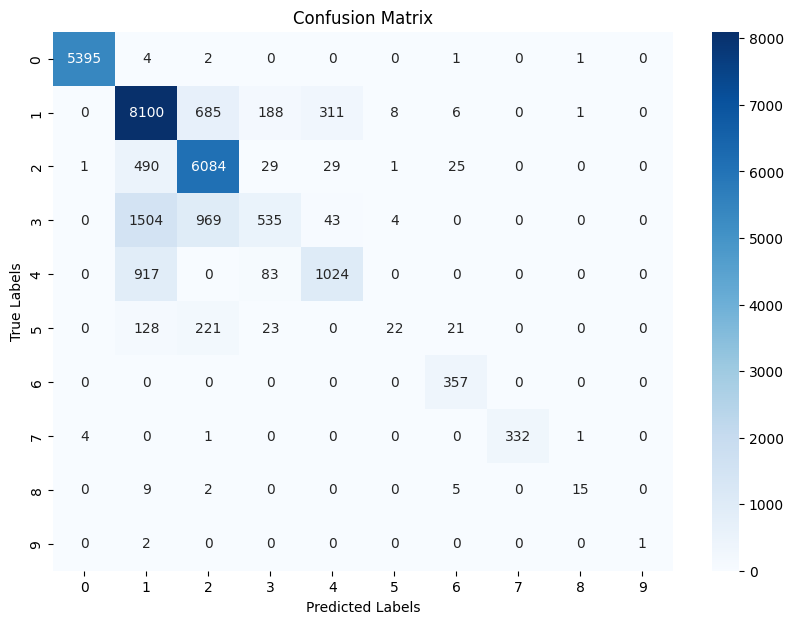

Start Round 14 ...
client_0: Loss = 0.3866, Accuracy = 0.8295
client_1: Loss = 0.3822, Accuracy = 0.8338
client_2: Loss = 0.387, Accuracy = 0.8309
client_3: Loss = 0.4038, Accuracy = 0.8232
client_4: Loss = 0.3934, Accuracy = 0.8263
After round 14, train_loss = 0.3805, train_acc = 0.8328, dev_loss = 0.3962, dev_acc = 0.8286, test_loss = 0.3936, test_acc = 0.8277
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9993    0.9996    0.9994     18025
           1     0.8881    0.7789    0.8299     31173
           2     0.9077    0.8628    0.8847     21542
           3     0.5227    0.6186    0.5666     10421
           4     0.5988    0.9648    0.7390      6596
           5     0.7088    0.1426    0.2374      1417
           6     0.9028    0.9957    0.9470      1175
           7     1.0000    0.9930    0.9965      1149
           8     0.9574    0.6164    0.7500        73
           9     1.0000    0.8750    0.9333         8



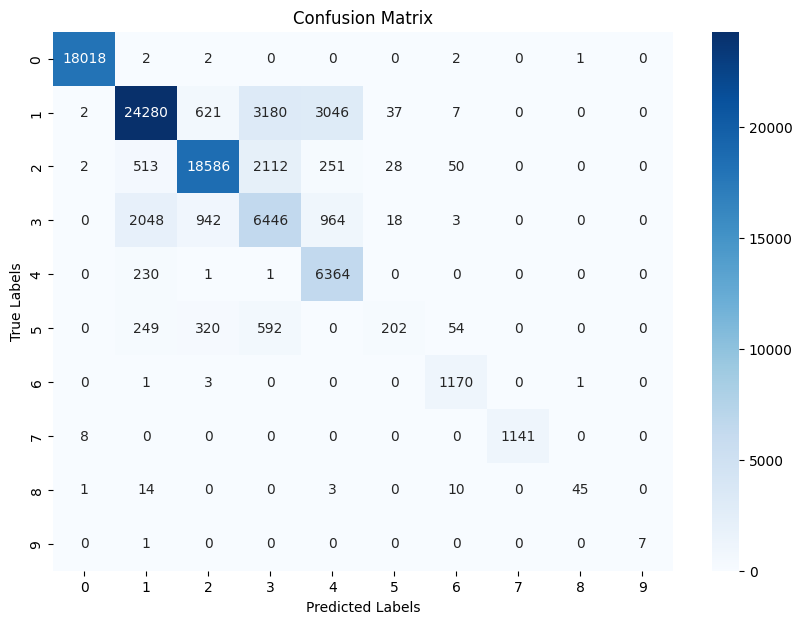

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9986    0.9978    0.9982      3599
           1     0.8786    0.7723    0.8220      6381
           2     0.9013    0.8750    0.8879      4433
           3     0.5238    0.6075    0.5626      2153
           4     0.6007    0.9549    0.7375      1374
           5     0.6833    0.1306    0.2193       314
           6     0.9084    0.9958    0.9501       239
           7     0.9957    0.9831    0.9894       237
           8     1.0000    0.4000    0.5714        25
           9     1.0000    0.6667    0.8000         3

    accuracy                         0.8286     18758
   macro avg     0.8490    0.7384    0.7538     18758
weighted avg     0.8447    0.8286    0.8288     18758



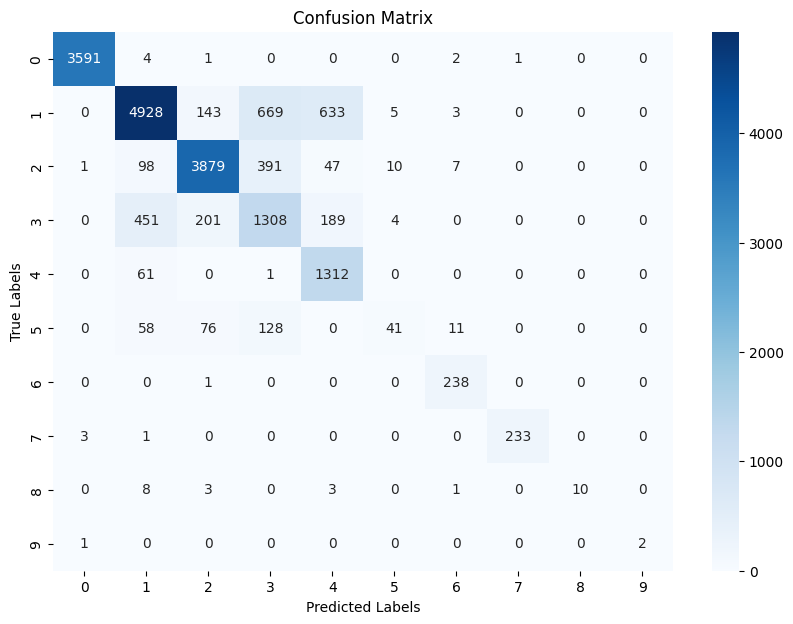

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9980    0.9994    0.9987      5403
           1     0.8806    0.7713    0.8223      9299
           2     0.9061    0.8632    0.8841      6659
           3     0.5019    0.6013    0.5471      3055
           4     0.6077    0.9659    0.7460      2024
           5     0.5692    0.0892    0.1542       415
           6     0.8925    1.0000    0.9432       357
           7     1.0000    0.9793    0.9895       338
           8     0.8000    0.2581    0.3902        31
           9     1.0000    0.6667    0.8000         3

    accuracy                         0.8283     27584
   macro avg     0.8156    0.7194    0.7275     27584
weighted avg     0.8446    0.8283    0.8288     27584



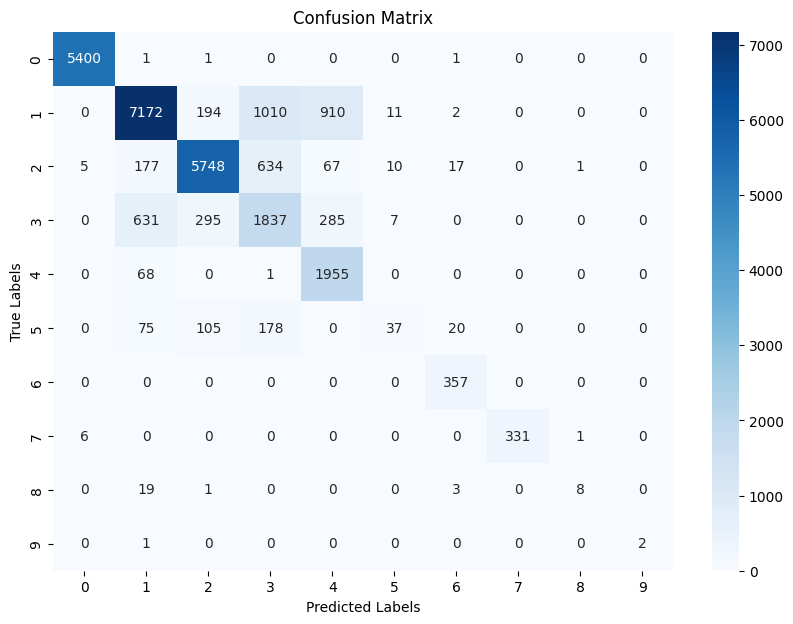

Start Round 15 ...
client_0: Loss = 0.3797, Accuracy = 0.8324
client_1: Loss = 0.3887, Accuracy = 0.8288
client_2: Loss = 0.3845, Accuracy = 0.8307
client_3: Loss = 0.3914, Accuracy = 0.8283
client_4: Loss = 0.3889, Accuracy = 0.8259
After round 15, train_loss = 0.3612, train_acc = 0.8334, dev_loss = 0.3786, dev_acc = 0.8263, test_loss = 0.3767, test_acc = 0.8243
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9994    0.9994    0.9994     18025
           1     0.8089    0.8579    0.8327     31173
           2     0.8535    0.9004    0.8763     21542
           3     0.5797    0.5220    0.5494     10421
           4     0.7452    0.6207    0.6773      6596
           5     0.6569    0.1891    0.2937      1417
           6     0.9089    0.9932    0.9492      1175
           7     1.0000    0.9939    0.9969      1149
           8     0.9792    0.6438    0.7769        73
           9     1.0000    0.8750    0.9333         8


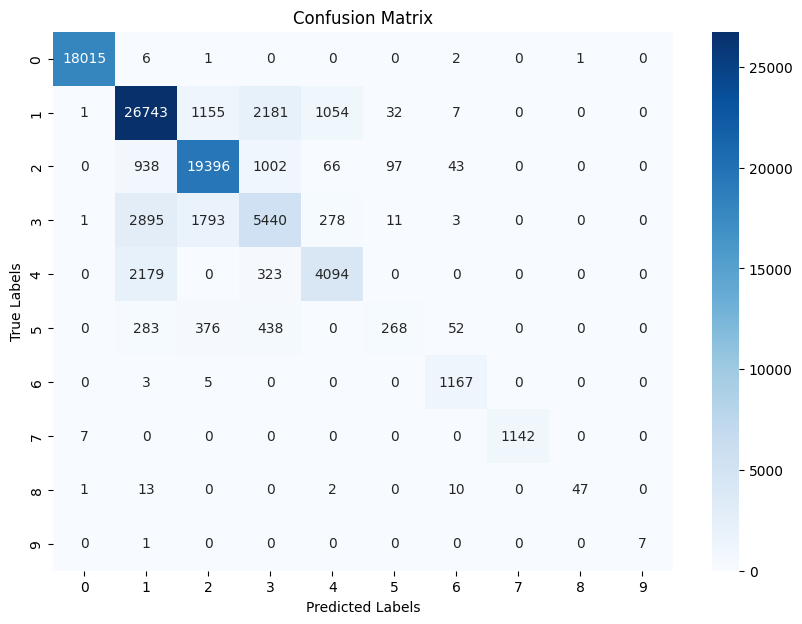

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9986    0.9975    0.9981      3599
           1     0.7977    0.8492    0.8227      6381
           2     0.8476    0.9086    0.8771      4433
           3     0.5730    0.5142    0.5420      2153
           4     0.7447    0.5924    0.6599      1374
           5     0.6705    0.1879    0.2935       314
           6     0.9189    0.9958    0.9558       239
           7     0.9957    0.9831    0.9894       237
           8     1.0000    0.4000    0.5714        25
           9     1.0000    0.6667    0.8000         3

    accuracy                         0.8263     18758
   macro avg     0.8547    0.7095    0.7510     18758
weighted avg     0.8206    0.8263    0.8197     18758



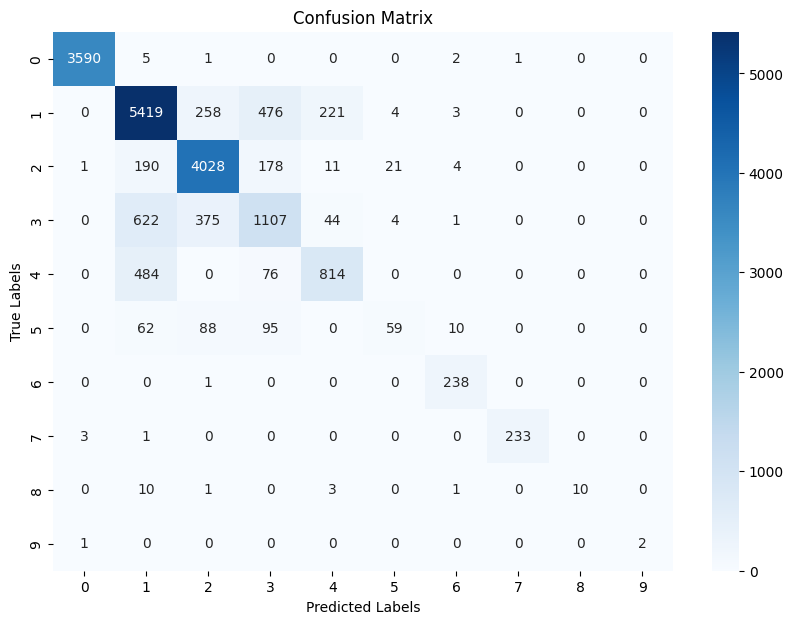

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9987    0.9993    0.9990      5403
           1     0.7948    0.8463    0.8197      9299
           2     0.8446    0.9006    0.8717      6659
           3     0.5631    0.4936    0.5261      3055
           4     0.7439    0.6057    0.6678      2024
           5     0.5225    0.1398    0.2205       415
           6     0.9015    1.0000    0.9482       357
           7     0.9940    0.9793    0.9866       338
           8     0.8750    0.2258    0.3590        31
           9     1.0000    0.6667    0.8000         3

    accuracy                         0.8249     27584
   macro avg     0.8238    0.6857    0.7199     27584
weighted avg     0.8172    0.8249    0.8179     27584



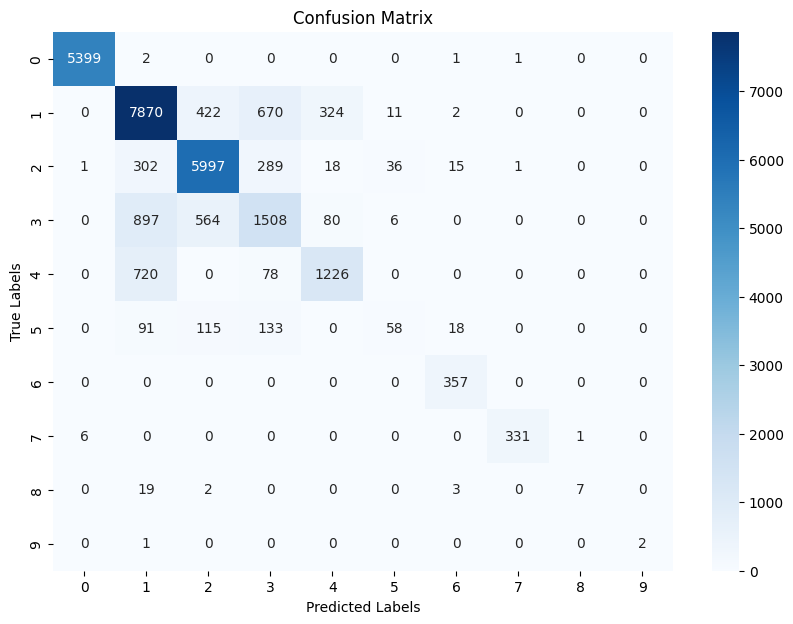

Start Round 16 ...
client_0: Loss = 0.3764, Accuracy = 0.8339
client_1: Loss = 0.3844, Accuracy = 0.8329
client_2: Loss = 0.3687, Accuracy = 0.8347
client_3: Loss = 0.3903, Accuracy = 0.8293
client_4: Loss = 0.3895, Accuracy = 0.8305
After round 16, train_loss = 0.4154, train_acc = 0.7960, dev_loss = 0.4297, dev_acc = 0.7927, test_loss = 0.4286, test_acc = 0.7925
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9992    0.9997    0.9994     18025
           1     0.6611    0.9468    0.7786     31173
           2     0.9410    0.8236    0.8784     21542
           3     0.6124    0.1108    0.1877     10421
           4     0.7175    0.6010    0.6541      6596
           5     0.8356    0.0861    0.1561      1417
           6     0.9154    0.9949    0.9535      1175
           7     1.0000    0.9939    0.9969      1149
           8     0.8615    0.7671    0.8116        73
           9     1.0000    0.8750    0.9333         8


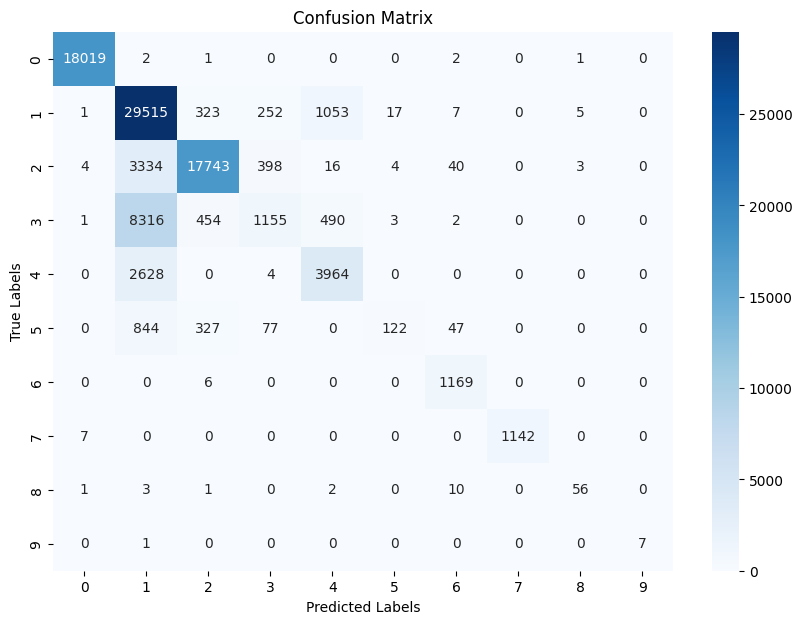

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9978    0.9972    0.9975      3599
           1     0.6579    0.9428    0.7750      6381
           2     0.9353    0.8346    0.8821      4433
           3     0.6015    0.1101    0.1861      2153
           4     0.7264    0.5873    0.6495      1374
           5     0.7750    0.0987    0.1751       314
           6     0.9119    0.9958    0.9520       239
           7     0.9957    0.9831    0.9894       237
           8     0.8500    0.6800    0.7556        25
           9     1.0000    0.3333    0.5000         3

    accuracy                         0.7927     18758
   macro avg     0.8451    0.6563    0.6862     18758
weighted avg     0.7970    0.7927    0.7611     18758



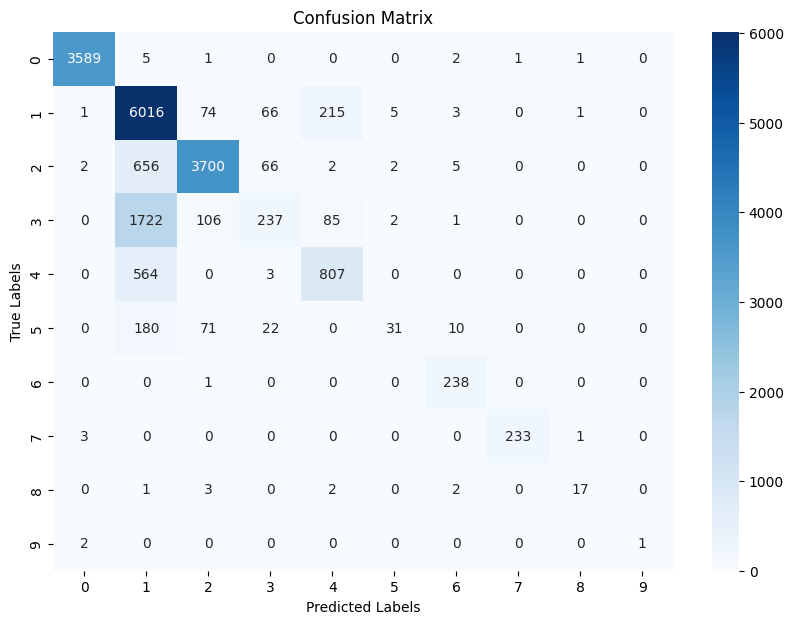

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9976    0.9991    0.9983      5403
           1     0.6561    0.9435    0.7740      9299
           2     0.9384    0.8258    0.8785      6659
           3     0.5576    0.1015    0.1717      3055
           4     0.7198    0.5647    0.6329      2024
           5     0.6667    0.0723    0.1304       415
           6     0.9084    1.0000    0.9520       357
           7     0.9970    0.9793    0.9881       338
           8     0.7826    0.5806    0.6667        31
           9     1.0000    1.0000    1.0000         3

    accuracy                         0.7926     27584
   macro avg     0.8224    0.7067    0.7193     27584
weighted avg     0.7927    0.7926    0.7613     27584



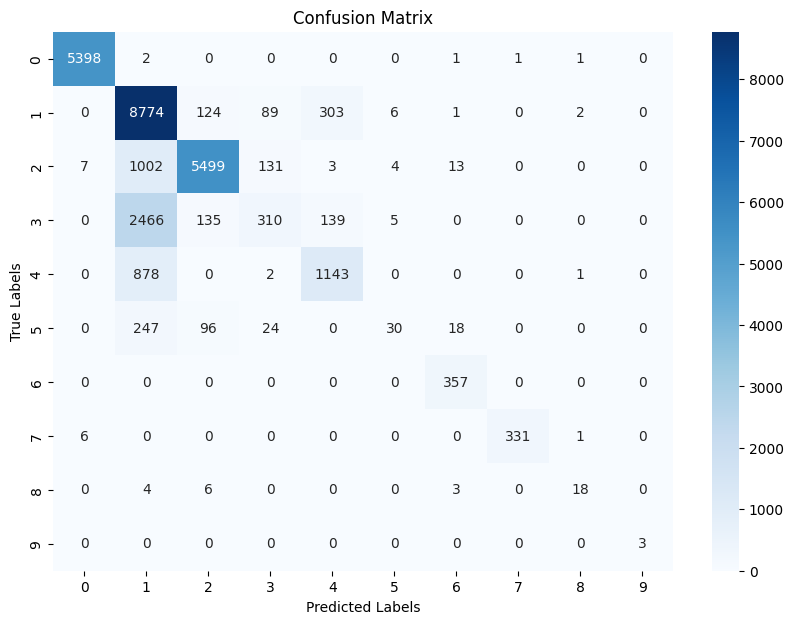

Start Round 17 ...
client_0: Loss = 0.3673, Accuracy = 0.839
client_1: Loss = 0.368, Accuracy = 0.8379
client_2: Loss = 0.3667, Accuracy = 0.8377
client_3: Loss = 0.3822, Accuracy = 0.8298
client_4: Loss = 0.3768, Accuracy = 0.8317
After round 17, train_loss = 0.3707, train_acc = 0.8388, dev_loss = 0.3940, dev_acc = 0.8312, test_loss = 0.3874, test_acc = 0.8334
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9996    0.9992    0.9994     18025
           1     0.9417    0.7507    0.8354     31173
           2     0.8073    0.9361    0.8669     21542
           3     0.5613    0.6938    0.6206     10421
           4     0.6712    0.8320    0.7430      6596
           5     0.7747    0.0995    0.1764      1417
           6     0.9084    0.9957    0.9501      1175
           7     1.0000    0.9948    0.9974      1149
           8     0.9615    0.6849    0.8000        73
           9     1.0000    1.0000    1.0000         8

 

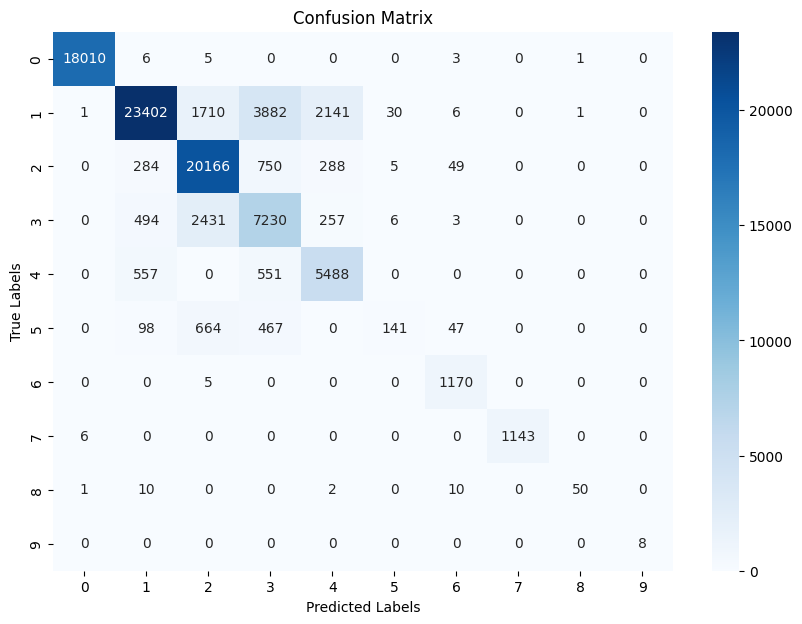

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9992    0.9972    0.9982      3599
           1     0.9349    0.7403    0.8263      6381
           2     0.7978    0.9382    0.8623      4433
           3     0.5514    0.6921    0.6138      2153
           4     0.6726    0.8042    0.7325      1374
           5     0.8571    0.1146    0.2022       314
           6     0.9119    0.9958    0.9520       239
           7     0.9957    0.9831    0.9894       237
           8     0.9333    0.5600    0.7000        25
           9     1.0000    1.0000    1.0000         3

    accuracy                         0.8312     18758
   macro avg     0.8654    0.7826    0.7877     18758
weighted avg     0.8508    0.8312    0.8296     18758



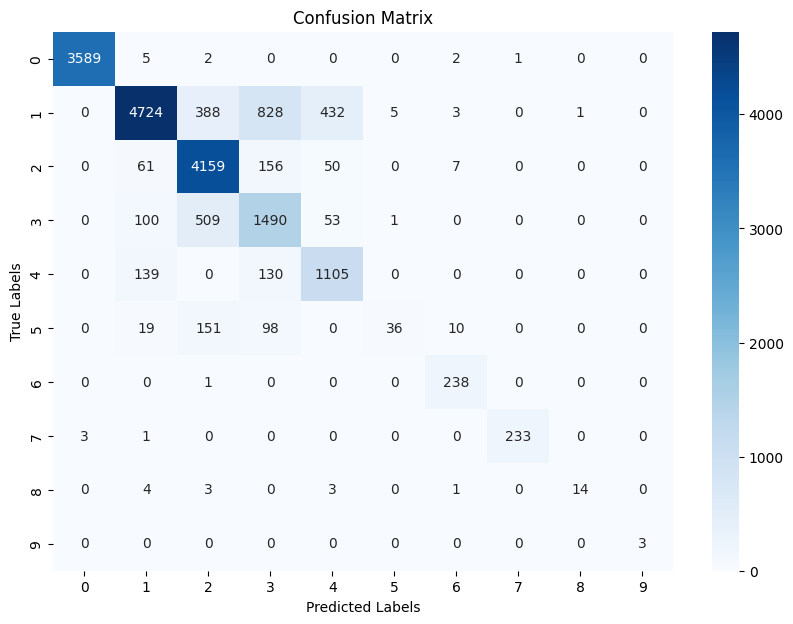

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9987    0.9989    0.9988      5403
           1     0.9342    0.7452    0.8291      9299
           2     0.8031    0.9309    0.8623      6659
           3     0.5493    0.6763    0.6062      3055
           4     0.6775    0.8335    0.7475      2024
           5     0.6182    0.0819    0.1447       415
           6     0.9013    0.9972    0.9468       357
           7     0.9940    0.9763    0.9851       338
           8     0.8571    0.1935    0.3158        31
           9     1.0000    1.0000    1.0000         3

    accuracy                         0.8341     27584
   macro avg     0.8333    0.7434    0.7436     27584
weighted avg     0.8492    0.8341    0.8323     27584



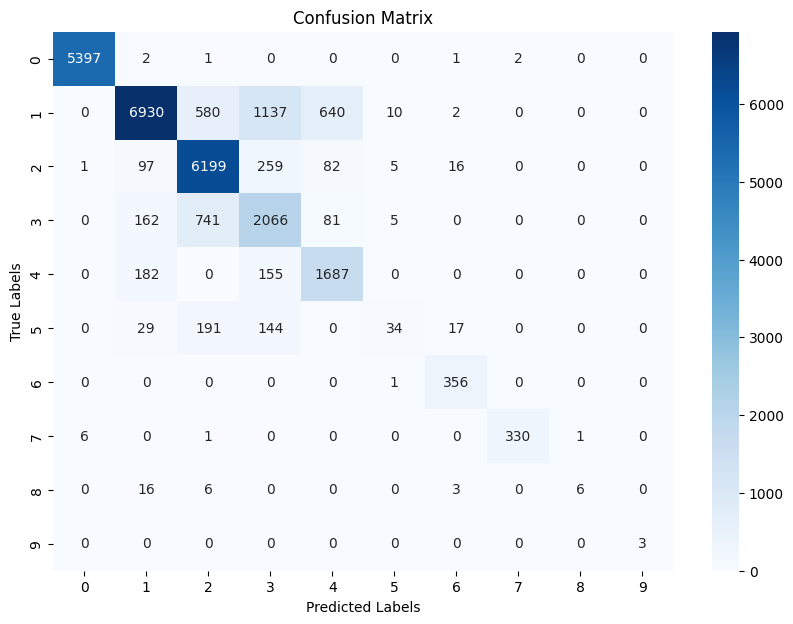

Start Round 18 ...
client_0: Loss = 0.4725, Accuracy = 0.81
client_1: Loss = 0.3984, Accuracy = 0.8216
client_2: Loss = 0.3591, Accuracy = 0.8407
client_3: Loss = 0.3726, Accuracy = 0.8345
client_4: Loss = 0.3677, Accuracy = 0.8389
After round 18, train_loss = 0.4071, train_acc = 0.8253, dev_loss = 0.4287, dev_acc = 0.8172, test_loss = 0.4268, test_acc = 0.8168
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9993    0.9978    0.9986     18025
           1     0.8350    0.8203    0.8276     31173
           2     0.8548    0.8491    0.8519     21542
           3     0.5476    0.5926    0.5692     10421
           4     0.6769    0.7670    0.7191      6596
           5     0.4956    0.1588    0.2405      1417
           6     0.9322    0.9719    0.9517      1175
           7     1.0000    0.9782    0.9890      1149
           8     1.0000    0.0274    0.0533        73
           9     1.0000    0.6250    0.7692         8

 

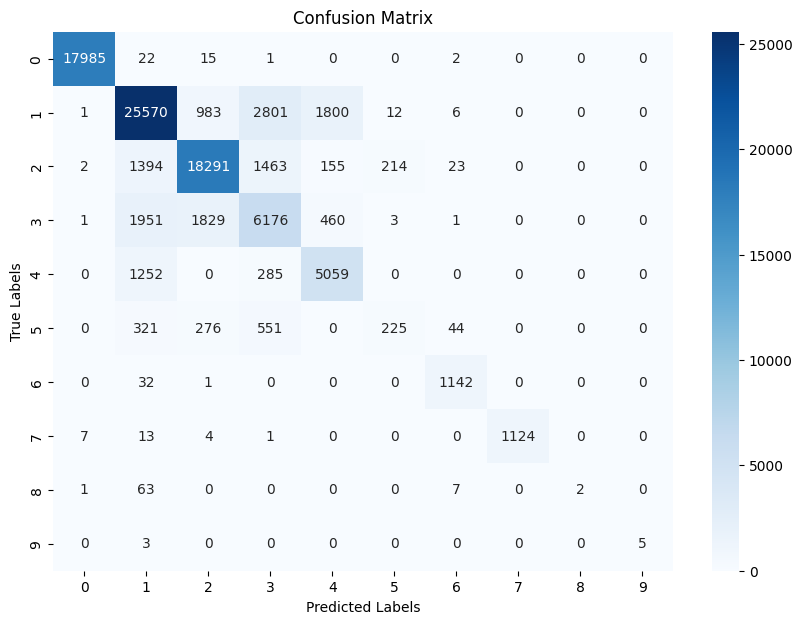

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9992    0.9956    0.9974      3599
           1     0.8255    0.8108    0.8181      6381
           2     0.8507    0.8471    0.8489      4433
           3     0.5362    0.5954    0.5643      2153
           4     0.6792    0.7475    0.7117      1374
           5     0.4038    0.1338    0.2010       314
           6     0.9355    0.9707    0.9528       239
           7     0.9957    0.9747    0.9851       237
           8     1.0000    0.0400    0.0769        25
           9     1.0000    0.6667    0.8000         3

    accuracy                         0.8172     18758
   macro avg     0.8226    0.6782    0.6956     18758
weighted avg     0.8176    0.8172    0.8153     18758



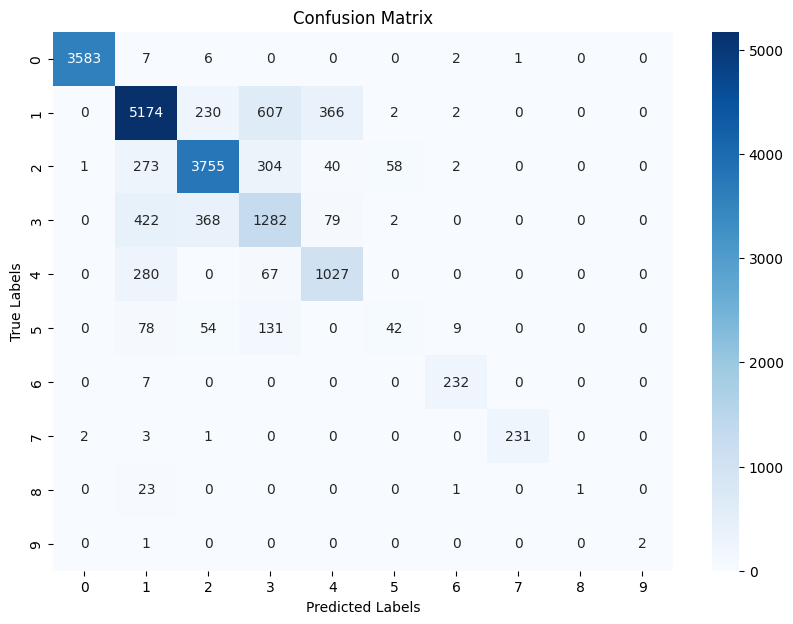

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9991    0.9981    0.9986      5403
           1     0.8213    0.8079    0.8145      9299
           2     0.8521    0.8524    0.8523      6659
           3     0.5232    0.5650    0.5433      3055
           4     0.6786    0.7574    0.7159      2024
           5     0.3689    0.1084    0.1676       415
           6     0.9326    0.9692    0.9505       357
           7     1.0000    0.9615    0.9804       338
           8     0.0000    0.0000    0.0000        31
           9     1.0000    0.3333    0.5000         3

    accuracy                         0.8178     27584
   macro avg     0.7176    0.6353    0.6523     27584
weighted avg     0.8160    0.8178    0.8155     27584



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


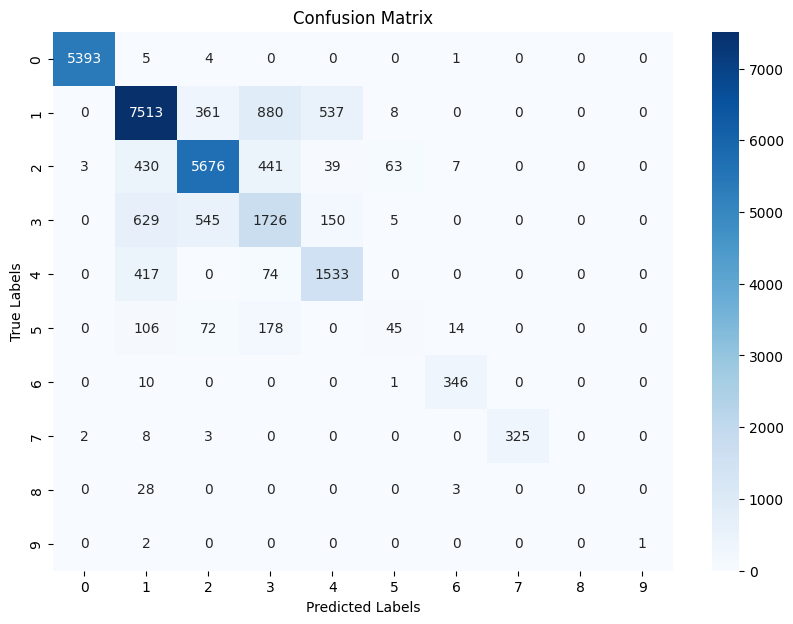

Start Round 19 ...
client_0: Loss = 0.3534, Accuracy = 0.8389
client_1: Loss = 0.3602, Accuracy = 0.8408
client_2: Loss = 0.3563, Accuracy = 0.8427
client_3: Loss = 0.3765, Accuracy = 0.8364
client_4: Loss = 0.3633, Accuracy = 0.8404
After round 19, train_loss = 0.3580, train_acc = 0.8422, dev_loss = 0.3764, dev_acc = 0.8350, test_loss = 0.3751, test_acc = 0.8325
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9995    0.9994    0.9995     18025
           1     0.8595    0.8253    0.8420     31173
           2     0.8899    0.8763    0.8831     21542
           3     0.5547    0.6184    0.5848     10421
           4     0.6888    0.8194    0.7485      6596
           5     0.6285    0.2089    0.3136      1417
           6     0.9112    0.9957    0.9516      1175
           7     1.0000    0.9948    0.9974      1149
           8     0.9524    0.5479    0.6957        73
           9     1.0000    1.0000    1.0000         8


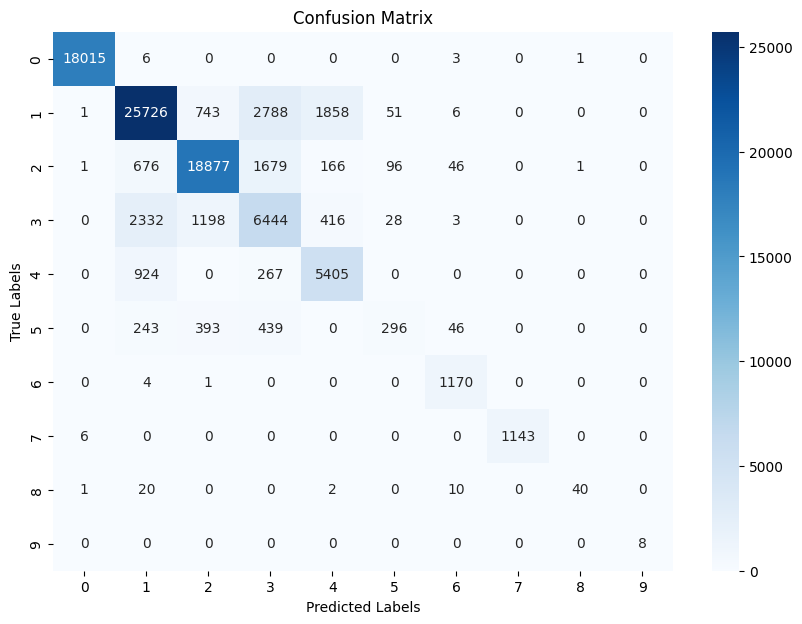

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9992    0.9972    0.9982      3599
           1     0.8495    0.8171    0.8330      6381
           2     0.8811    0.8845    0.8828      4433
           3     0.5455    0.6047    0.5736      2153
           4     0.6871    0.7977    0.7383      1374
           5     0.6413    0.1879    0.2906       314
           6     0.9154    0.9958    0.9539       239
           7     0.9957    0.9831    0.9894       237
           8     1.0000    0.2800    0.4375        25
           9     1.0000    1.0000    1.0000         3

    accuracy                         0.8350     18758
   macro avg     0.8515    0.7548    0.7697     18758
weighted avg     0.8383    0.8350    0.8337     18758



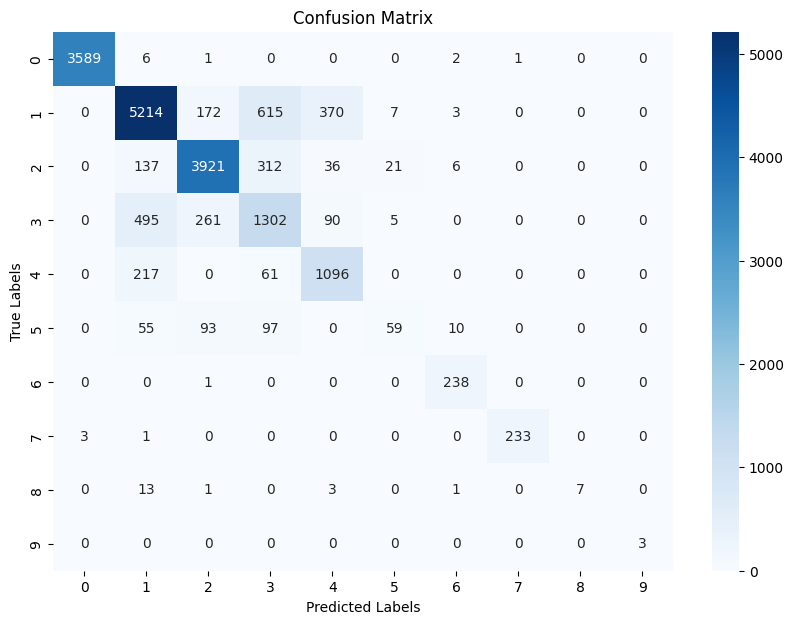

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9985    0.9989    0.9987      5403
           1     0.8436    0.8150    0.8291      9299
           2     0.8894    0.8734    0.8813      6659
           3     0.5248    0.5915    0.5562      3055
           4     0.6920    0.8048    0.7442      2024
           5     0.5083    0.1470    0.2280       415
           6     0.8970    1.0000    0.9457       357
           7     0.9940    0.9763    0.9851       338
           8     0.8333    0.1613    0.2703        31
           9     1.0000    1.0000    1.0000         3

    accuracy                         0.8332     27584
   macro avg     0.8181    0.7368    0.7439     27584
weighted avg     0.8361    0.8332    0.8322     27584



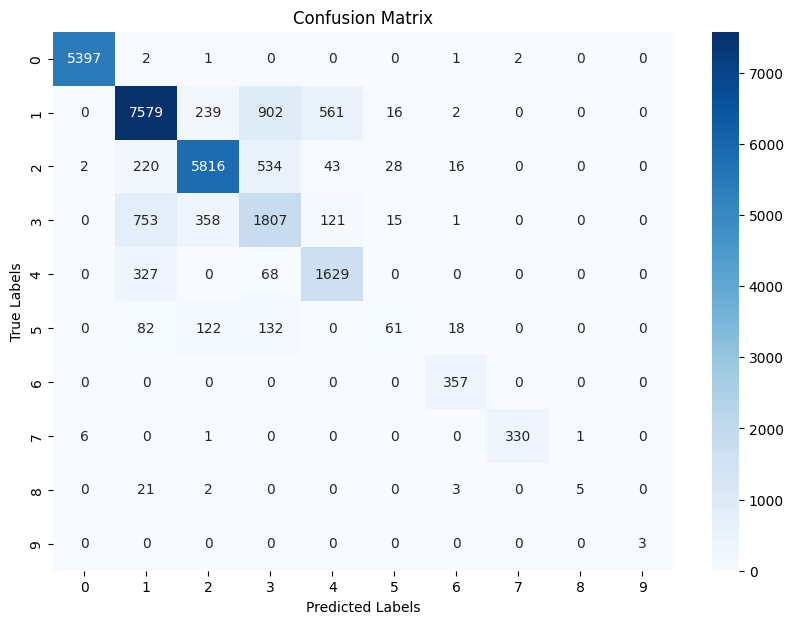

Start Round 20 ...
client_0: Loss = 0.3561, Accuracy = 0.8422
client_1: Loss = 0.3556, Accuracy = 0.8406
client_2: Loss = 0.352, Accuracy = 0.8436
client_3: Loss = 0.366, Accuracy = 0.8423
client_4: Loss = 0.3608, Accuracy = 0.8403
After round 20, train_loss = 0.4154, train_acc = 0.8050, dev_loss = 0.4363, dev_acc = 0.7992, test_loss = 0.4388, test_acc = 0.7942
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9994    0.9997    0.9996     18025
           1     0.8109    0.8406    0.8255     31173
           2     0.8132    0.9006    0.8547     21542
           3     0.5421    0.5408    0.5415     10421
           4     0.6798    0.4468    0.5392      6596
           5     0.1871    0.1842    0.1856      1417
           6     0.9545    0.0536    0.1015      1175
           7     1.0000    0.9948    0.9974      1149
           8     0.9714    0.4658    0.6296        73
           9     1.0000    1.0000    1.0000         8

 

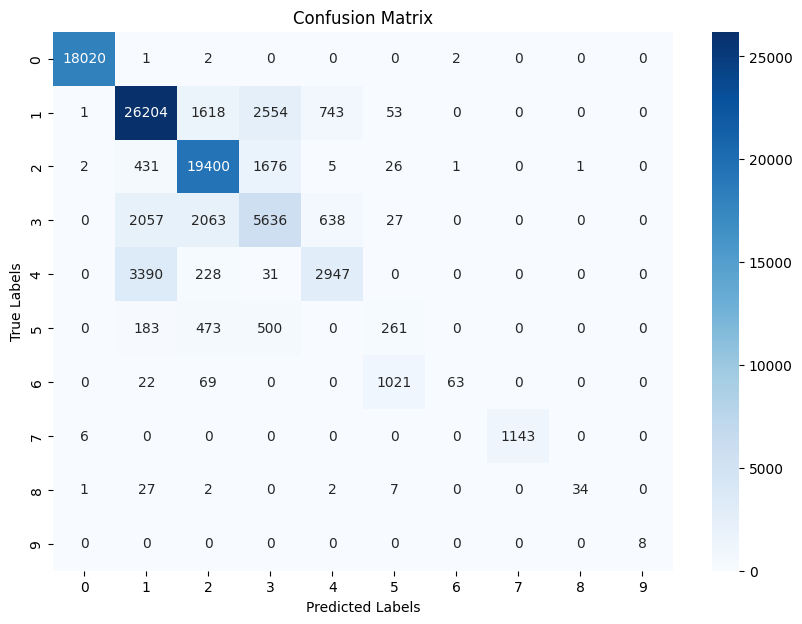

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9986    0.9978    0.9982      3599
           1     0.8038    0.8336    0.8184      6381
           2     0.8027    0.9075    0.8519      4433
           3     0.5408    0.5300    0.5353      2153
           4     0.6776    0.4360    0.5306      1374
           5     0.2100    0.1879    0.1983       314
           6     0.7857    0.0460    0.0870       239
           7     1.0000    0.9831    0.9915       237
           8     1.0000    0.3200    0.4848        25
           9     1.0000    1.0000    1.0000         3

    accuracy                         0.7990     18758
   macro avg     0.7819    0.6242    0.6496     18758
weighted avg     0.7941    0.7990    0.7893     18758



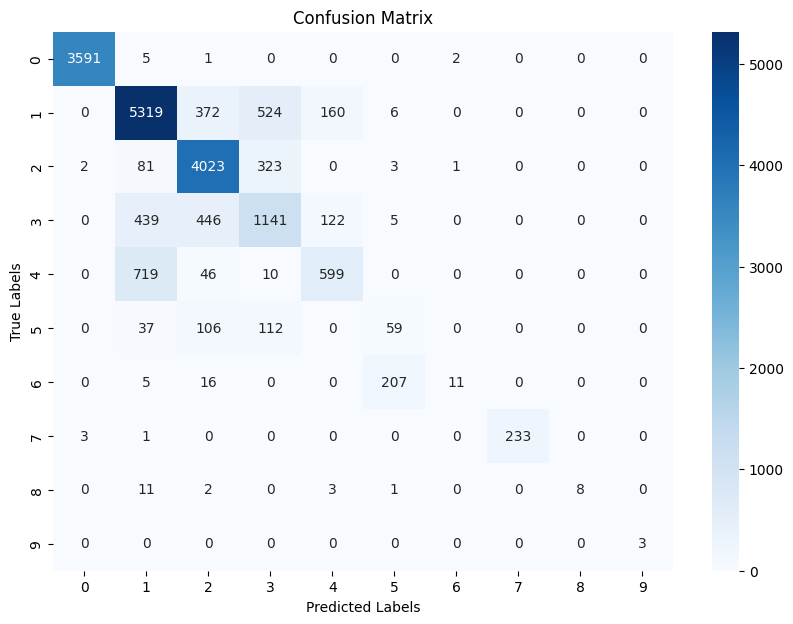

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9982    0.9991    0.9986      5403
           1     0.7968    0.8299    0.8130      9299
           2     0.8076    0.8997    0.8512      6659
           3     0.5091    0.5015    0.5053      3055
           4     0.6758    0.4284    0.5243      2024
           5     0.1432    0.1446    0.1439       415
           6     0.9000    0.0504    0.0955       357
           7     0.9970    0.9793    0.9881       338
           8     0.8571    0.1935    0.3158        31
           9     1.0000    1.0000    1.0000         3

    accuracy                         0.7948     27584
   macro avg     0.7685    0.6026    0.6236     27584
weighted avg     0.7922    0.7948    0.7856     27584



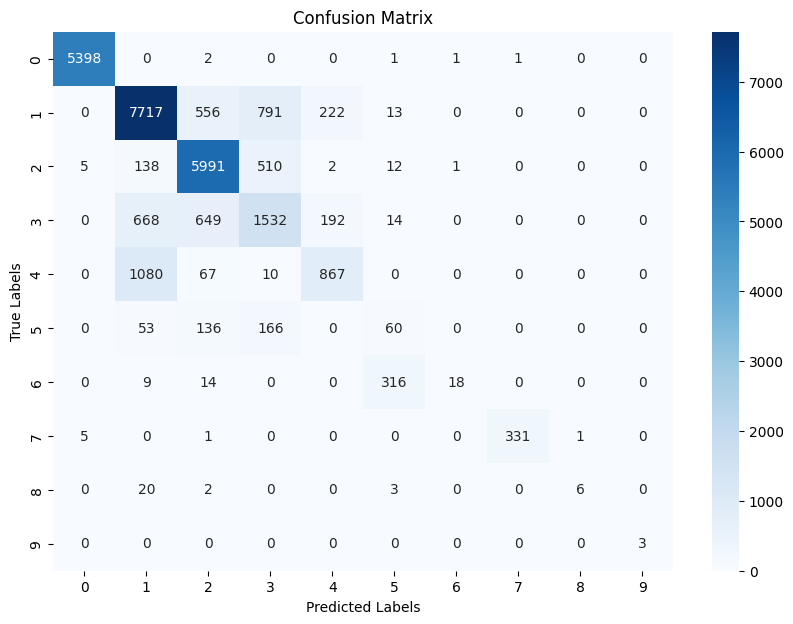

Start Round 21 ...
client_0: Loss = 0.3652, Accuracy = 0.8404
client_1: Loss = 0.3598, Accuracy = 0.8433
client_2: Loss = 0.3436, Accuracy = 0.8498
client_3: Loss = 0.3597, Accuracy = 0.8425
client_4: Loss = 0.3725, Accuracy = 0.836
After round 21, train_loss = 0.5852, train_acc = 0.7649, dev_loss = 0.6082, dev_acc = 0.7575, test_loss = 0.6079, test_acc = 0.7561
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9977    0.9997    0.9987     18025
           1     0.8654    0.7401    0.7979     31173
           2     0.7094    0.9031    0.7946     21542
           3     0.4188    0.5129    0.4611     10421
           4     0.4030    0.2418    0.3023      6596
           5     0.7791    0.1418    0.2400      1417
           6     0.9199    0.9974    0.9571      1175
           7     1.0000    0.9930    0.9965      1149
           8     1.0000    0.6027    0.7521        73
           9     0.0000    0.0000    0.0000         8



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


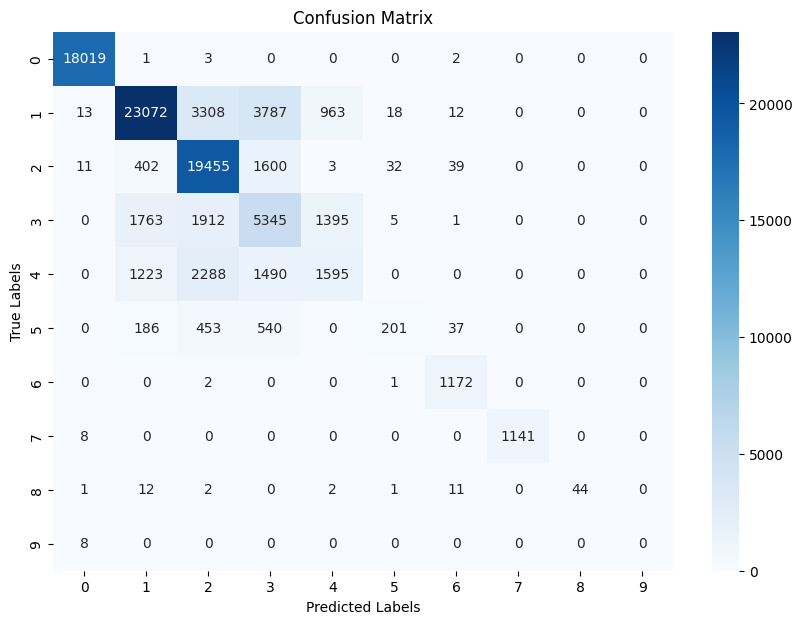

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9961    0.9981    0.9971      3599
           1     0.8636    0.7286    0.7904      6381
           2     0.7070    0.9102    0.7959      4433
           3     0.4062    0.4998    0.4481      2153
           4     0.3926    0.2460    0.3025      1374
           5     0.7083    0.1083    0.1878       314
           6     0.9151    0.9916    0.9518       239
           7     0.9957    0.9831    0.9894       237
           8     1.0000    0.4400    0.6111        25
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7573     18758
   macro avg     0.6985    0.5906    0.6074     18758
weighted avg     0.7648    0.7573    0.7504     18758



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


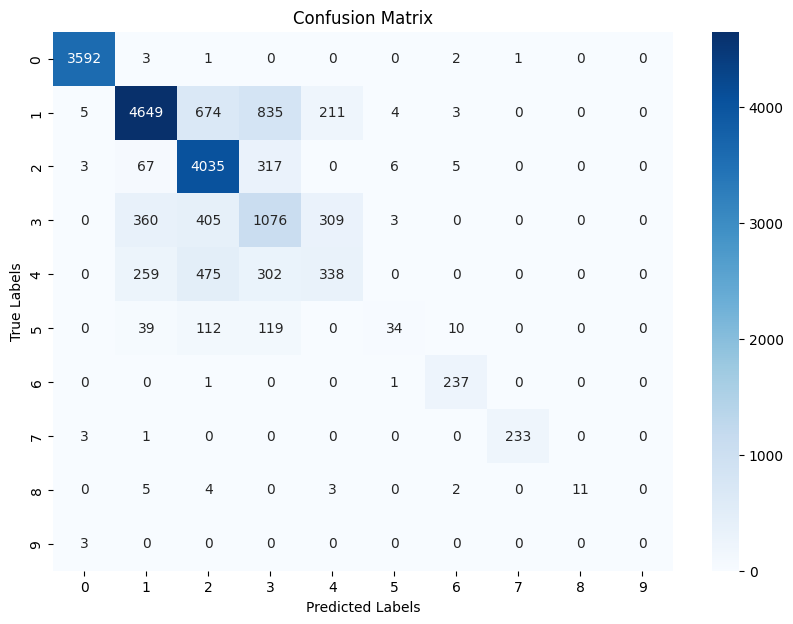

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9961    0.9994    0.9978      5403
           1     0.8563    0.7262    0.7859      9299
           2     0.7108    0.9052    0.7964      6659
           3     0.3968    0.4982    0.4417      3055
           4     0.3765    0.2169    0.2752      2024
           5     0.6441    0.0916    0.1603       415
           6     0.8987    0.9944    0.9441       357
           7     0.9940    0.9793    0.9866       338
           8     0.8750    0.2258    0.3590        31
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7567     27584
   macro avg     0.6748    0.5637    0.5747     27584
weighted avg     0.7615    0.7567    0.7489     27584



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


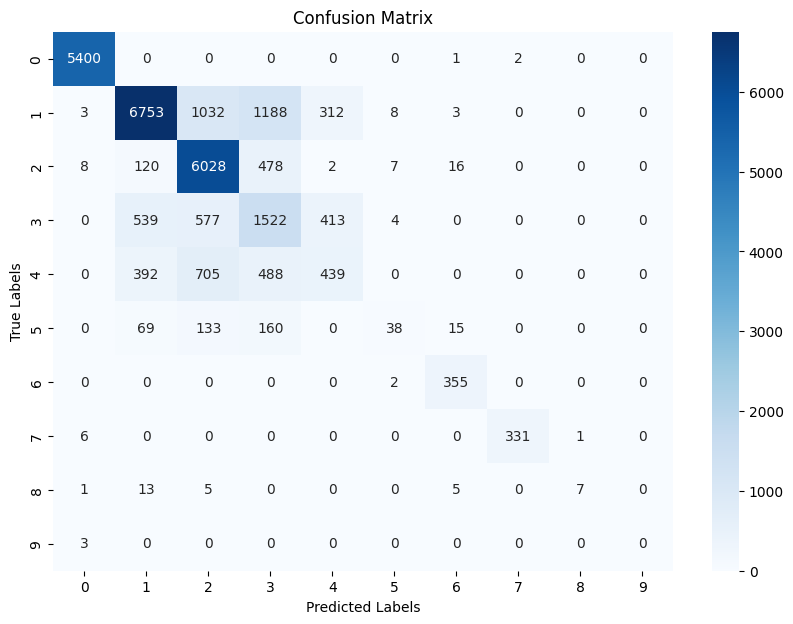

Start Round 22 ...
client_0: Loss = 0.3406, Accuracy = 0.8469
client_1: Loss = 0.35, Accuracy = 0.8449
client_2: Loss = 0.3414, Accuracy = 0.8473
client_3: Loss = 0.3638, Accuracy = 0.8394
client_4: Loss = 0.3543, Accuracy = 0.8417
After round 22, train_loss = 0.3644, train_acc = 0.8417, dev_loss = 0.3852, dev_acc = 0.8358, test_loss = 0.3875, test_acc = 0.8308
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     18025
           1     0.9174    0.7713    0.8381     31173
           2     0.9409    0.8518    0.8941     21542
           3     0.4959    0.8558    0.6279     10421
           4     0.7308    0.7741    0.7518      6596
           5     0.6912    0.1990    0.3090      1417
           6     0.9198    0.9957    0.9563      1175
           7     1.0000    0.9956    0.9978      1149
           8     0.9730    0.4932    0.6545        73
           9     1.0000    1.0000    1.0000         8

 

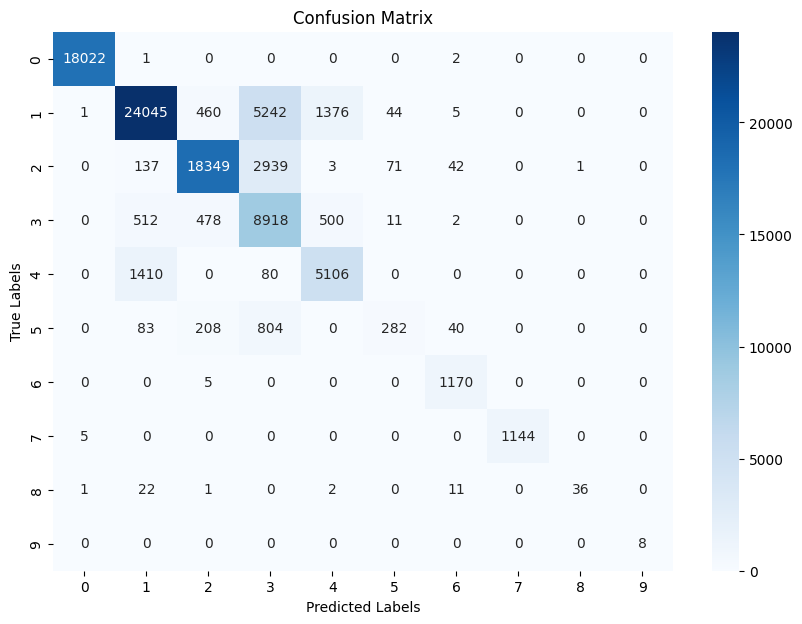

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9986    0.9978    0.9982      3599
           1     0.9078    0.7604    0.8276      6381
           2     0.9327    0.8653    0.8977      4433
           3     0.4935    0.8504    0.6246      2153
           4     0.7326    0.7518    0.7421      1374
           5     0.6420    0.1656    0.2633       314
           6     0.9189    0.9958    0.9558       239
           7     0.9957    0.9831    0.9894       237
           8     1.0000    0.2800    0.4375        25
           9     1.0000    1.0000    1.0000         3

    accuracy                         0.8357     18758
   macro avg     0.8622    0.7650    0.7736     18758
weighted avg     0.8676    0.8357    0.8411     18758



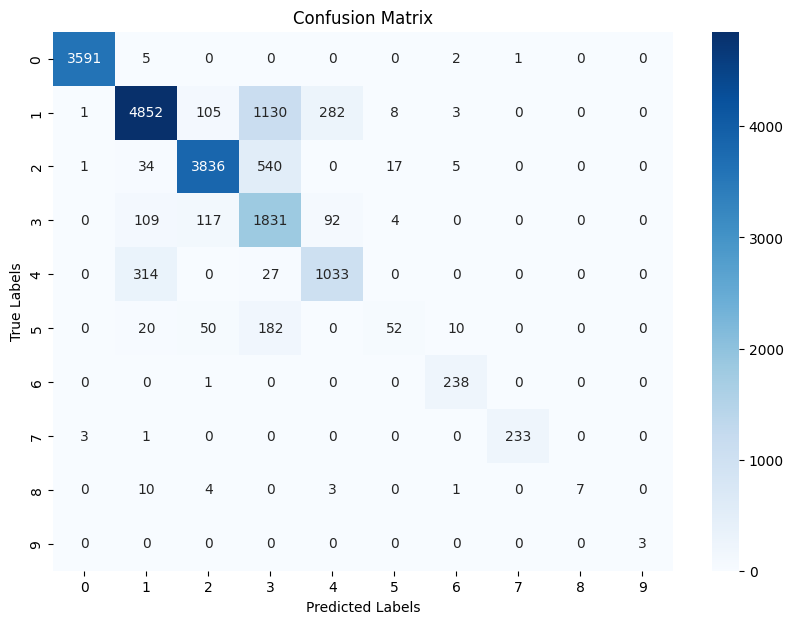

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9989    0.9996    0.9993      5403
           1     0.9052    0.7585    0.8253      9299
           2     0.9304    0.8507    0.8888      6659
           3     0.4757    0.8363    0.6065      3055
           4     0.7206    0.7441    0.7321      2024
           5     0.5673    0.1422    0.2274       415
           6     0.9105    0.9972    0.9519       357
           7     1.0000    0.9793    0.9895       338
           8     0.8333    0.1613    0.2703        31
           9     1.0000    1.0000    1.0000         3

    accuracy                         0.8314     27584
   macro avg     0.8342    0.7469    0.7491     27584
weighted avg     0.8646    0.8314    0.8377     27584



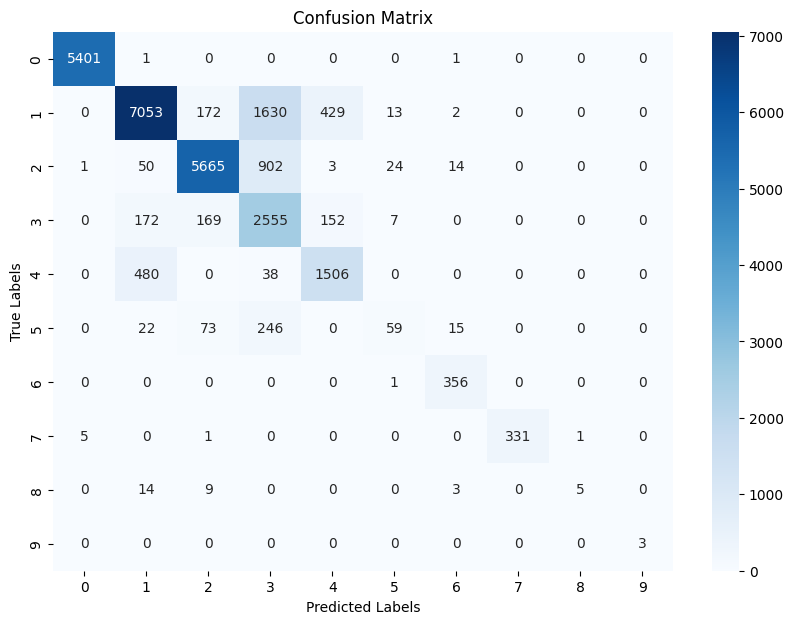

Start Round 23 ...
client_0: Loss = 0.3588, Accuracy = 0.8423
client_1: Loss = 0.3575, Accuracy = 0.8457
client_2: Loss = 0.3369, Accuracy = 0.8484
client_3: Loss = 0.3668, Accuracy = 0.8426
client_4: Loss = 0.3489, Accuracy = 0.8433
After round 23, train_loss = 0.3786, train_acc = 0.8367, dev_loss = 0.4048, dev_acc = 0.8292, test_loss = 0.3983, test_acc = 0.8300
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9992    0.9995     18025
           1     0.9490    0.7399    0.8315     31173
           2     0.7970    0.9531    0.8681     21542
           3     0.5671    0.6487    0.6052     10421
           4     0.6445    0.8537    0.7345      6596
           5     0.6724    0.1651    0.2652      1417
           6     0.9148    0.9966    0.9540      1175
           7     1.0000    0.9983    0.9991      1149
           8     0.9167    0.7534    0.8271        73
           9     0.8889    1.0000    0.9412         8


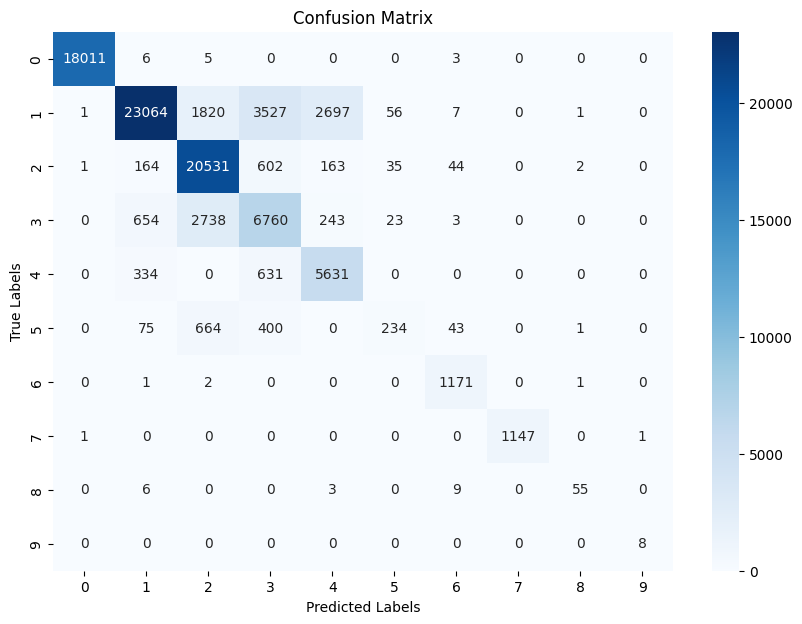

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9994    0.9967    0.9981      3599
           1     0.9437    0.7297    0.8230      6381
           2     0.7886    0.9510    0.8623      4433
           3     0.5572    0.6563    0.6027      2153
           4     0.6458    0.8333    0.7277      1374
           5     0.7164    0.1529    0.2520       314
           6     0.9225    0.9958    0.9577       239
           7     0.9915    0.9873    0.9894       237
           8     0.9375    0.6000    0.7317        25
           9     1.0000    1.0000    1.0000         3

    accuracy                         0.8292     18758
   macro avg     0.8503    0.7903    0.7945     18758
weighted avg     0.8481    0.8292    0.8278     18758



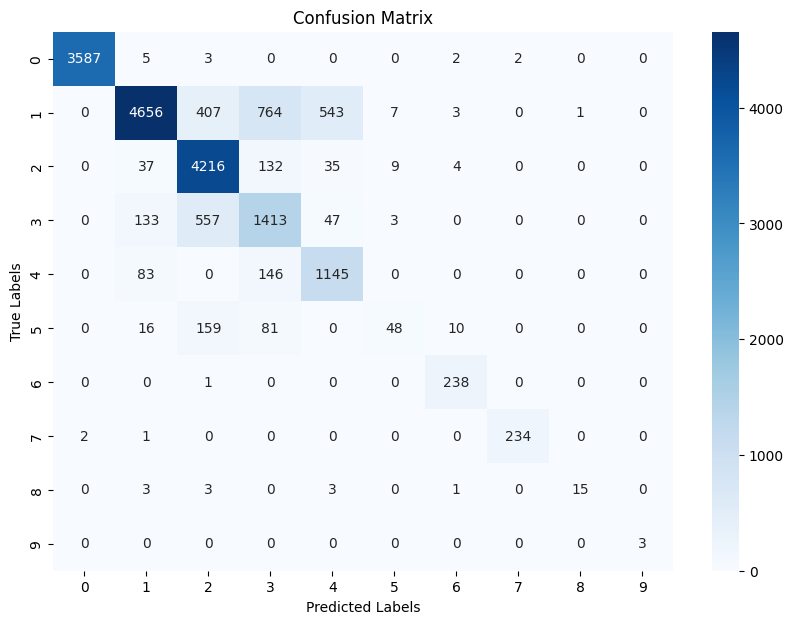

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9989    0.9985    0.9987      5403
           1     0.9390    0.7296    0.8212      9299
           2     0.7942    0.9482    0.8644      6659
           3     0.5500    0.6350    0.5895      3055
           4     0.6497    0.8523    0.7373      2024
           5     0.5862    0.1229    0.2032       415
           6     0.9059    0.9972    0.9493       357
           7     1.0000    0.9793    0.9895       338
           8     0.8182    0.2903    0.4286        31
           9     1.0000    1.0000    1.0000         3

    accuracy                         0.8305     27584
   macro avg     0.8242    0.7553    0.7582     27584
weighted avg     0.8463    0.8305    0.8286     27584



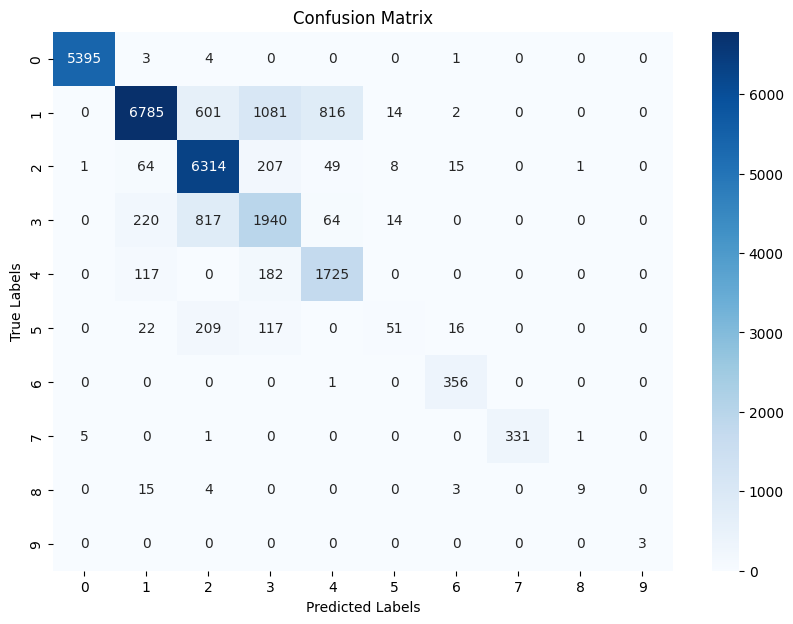

Start Round 24 ...
client_0: Loss = 0.3448, Accuracy = 0.8471
client_1: Loss = 0.3377, Accuracy = 0.8511
client_2: Loss = 0.3362, Accuracy = 0.8486
client_3: Loss = 0.3526, Accuracy = 0.8423
client_4: Loss = 0.3422, Accuracy = 0.8474
After round 24, train_loss = 0.3617, train_acc = 0.8224, dev_loss = 0.3829, dev_acc = 0.8130, test_loss = 0.3879, test_acc = 0.8074
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998     18025
           1     0.7369    0.9130    0.8156     31173
           2     0.9490    0.8455    0.8943     21542
           3     0.5767    0.5523    0.5643     10421
           4     0.7552    0.3367    0.4658      6596
           5     0.7781    0.1905    0.3061      1417
           6     0.9236    0.9974    0.9591      1175
           7     1.0000    0.9974    0.9987      1149
           8     0.9773    0.5890    0.7350        73
           9     1.0000    1.0000    1.0000         8


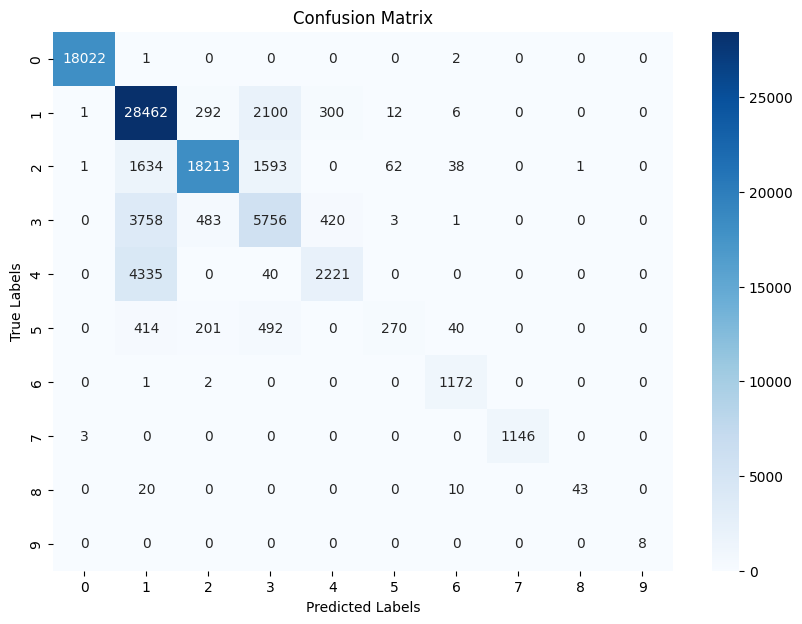

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9992    0.9975    0.9983      3599
           1     0.7265    0.9003    0.8041      6381
           2     0.9353    0.8550    0.8933      4433
           3     0.5635    0.5300    0.5462      2153
           4     0.7454    0.3261    0.4537      1374
           5     0.6806    0.1561    0.2539       314
           6     0.9189    0.9958    0.9558       239
           7     0.9915    0.9873    0.9894       237
           8     1.0000    0.3600    0.5294        25
           9     1.0000    1.0000    1.0000         3

    accuracy                         0.8128     18758
   macro avg     0.8561    0.7108    0.7424     18758
weighted avg     0.8163    0.8128    0.8019     18758



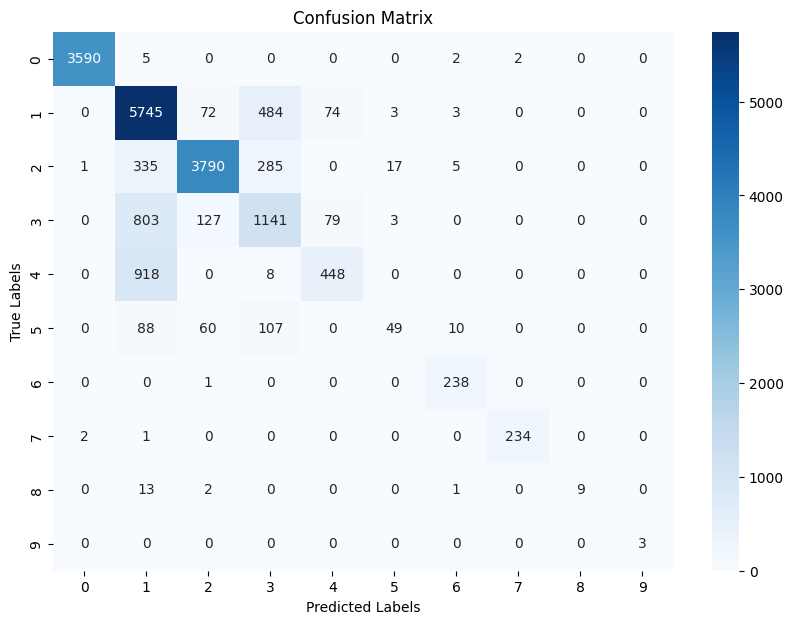

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9987    0.9993    0.9990      5403
           1     0.7181    0.9010    0.7992      9299
           2     0.9351    0.8411    0.8856      6659
           3     0.5400    0.5054    0.5222      3055
           4     0.7314    0.3014    0.4269      2024
           5     0.5843    0.1253    0.2063       415
           6     0.9084    1.0000    0.9520       357
           7     0.9940    0.9822    0.9881       338
           8     0.8889    0.2581    0.4000        31
           9     1.0000    1.0000    1.0000         3

    accuracy                         0.8079     27584
   macro avg     0.8299    0.6914    0.7179     27584
weighted avg     0.8107    0.8079    0.7961     27584



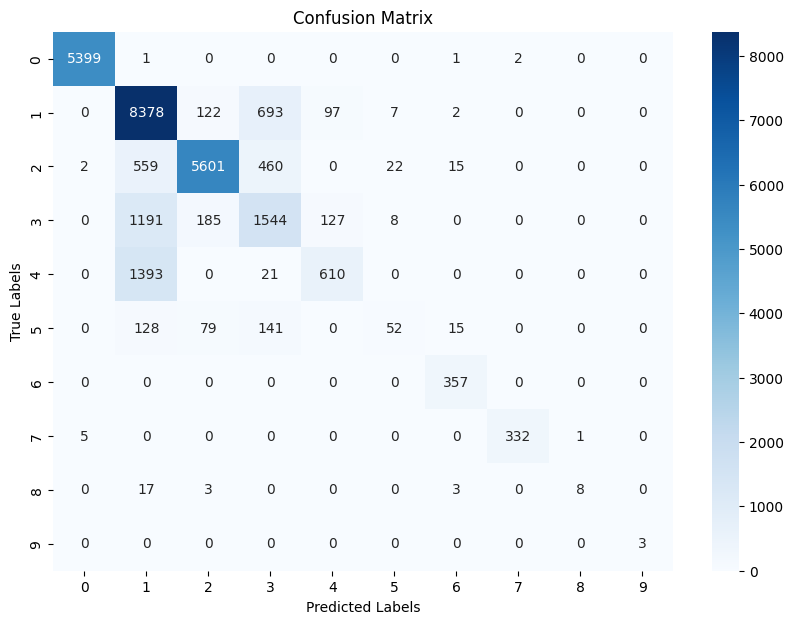

Start Round 25 ...
client_0: Loss = 0.3351, Accuracy = 0.8498
client_1: Loss = 0.3372, Accuracy = 0.849
client_2: Loss = 0.3361, Accuracy = 0.8512
client_3: Loss = 0.3461, Accuracy = 0.8498
client_4: Loss = 0.3408, Accuracy = 0.8444
After round 25, train_loss = 0.3900, train_acc = 0.8232, dev_loss = 0.4179, dev_acc = 0.8118, test_loss = 0.4094, test_acc = 0.8159
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9997    0.9994    0.9996     18025
           1     0.7898    0.8678    0.8270     31173
           2     0.8038    0.9147    0.8556     21542
           3     0.6662    0.2835    0.3977     10421
           4     0.6882    0.7521    0.7187      6596
           5     0.4844    0.2512    0.3309      1417
           6     0.9433    0.9626    0.9528      1175
           7     0.9991    0.9983    0.9987      1149
           8     0.9508    0.7945    0.8657        73
           9     1.0000    1.0000    1.0000         8



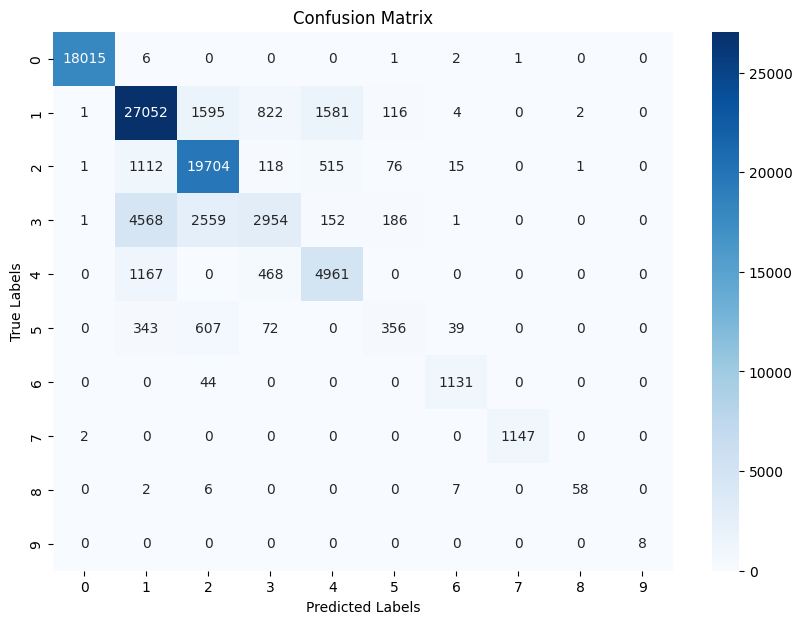

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9992    0.9969    0.9981      3599
           1     0.7766    0.8590    0.8157      6381
           2     0.7929    0.9113    0.8480      4433
           3     0.6322    0.2643    0.3727      2153
           4     0.6889    0.7300    0.7088      1374
           5     0.4304    0.2166    0.2881       314
           6     0.9342    0.9498    0.9419       239
           7     0.9915    0.9873    0.9894       237
           8     0.8333    0.6000    0.6977        25
           9     1.0000    1.0000    1.0000         3

    accuracy                         0.8118     18758
   macro avg     0.8079    0.7515    0.7660     18758
weighted avg     0.7992    0.8118    0.7945     18758



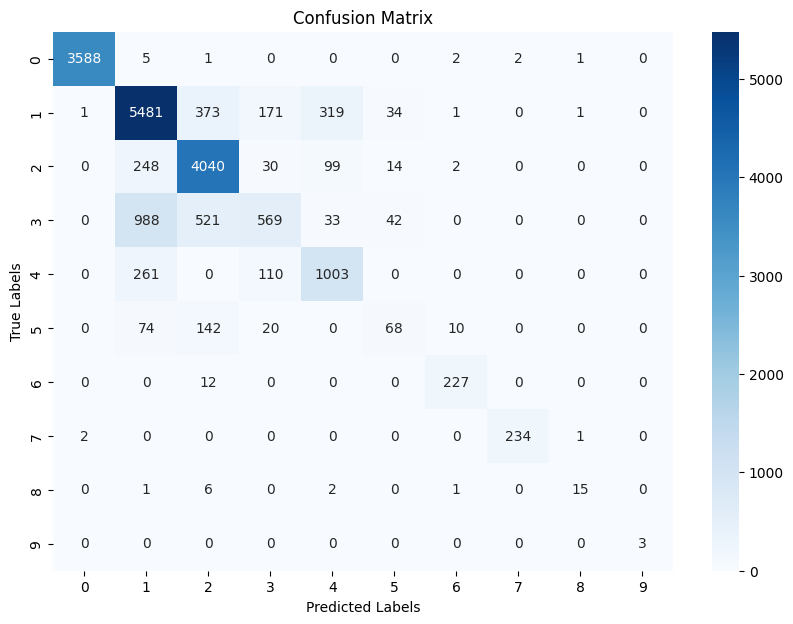

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9991    0.9991    0.9991      5403
           1     0.7800    0.8571    0.8167      9299
           2     0.7954    0.9144    0.8508      6659
           3     0.6255    0.2520    0.3593      3055
           4     0.7020    0.7451    0.7229      2024
           5     0.3932    0.1952    0.2609       415
           6     0.9350    0.9664    0.9504       357
           7     0.9940    0.9852    0.9896       338
           8     0.9375    0.4839    0.6383        31
           9     1.0000    1.0000    1.0000         3

    accuracy                         0.8161     27584
   macro avg     0.8162    0.7398    0.7588     27584
weighted avg     0.8028    0.8161    0.7984     27584



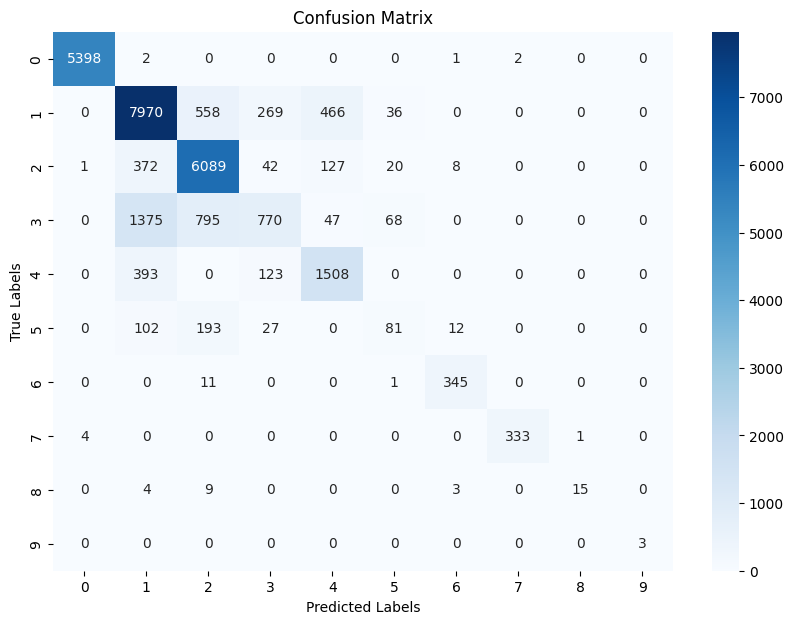

In [24]:
global_net = to_device(FederatedNet(), device)
history = []
for i in range(rounds):
    print('Start Round {} ...'.format(i + 1))
    curr_parameters = global_net.get_parameters()
    new_parameters = dict([(layer_name, {'weight': 0, 'bias': 0}) for layer_name in curr_parameters])
    for client in clients:
        client_parameters = client.train(curr_parameters)
        fraction = client.get_dataset_size() / total_train_size
        for layer_name in client_parameters:
            new_parameters[layer_name]['weight'] += fraction * client_parameters[layer_name]['weight']
            new_parameters[layer_name]['bias'] += fraction * client_parameters[layer_name]['bias']
    global_net.apply_parameters(new_parameters)
    
    # Evaluate on training, development, and testing datasets
    train_loss, train_acc, train_labels, train_preds = global_net.evaluate(train_dataset)
    dev_loss, dev_acc, dev_labels, dev_preds = global_net.evaluate(dev_dataset)
    test_loss, test_acc, test_labels, test_preds = global_net.evaluate(test_dataset)
    
    # Print results
    print('After round {}, train_loss = {:.4f}, train_acc = {:.4f}, dev_loss = {:.4f}, dev_acc = {:.4f}, test_loss = {:.4f}, test_acc = {:.4f}'.format(
        i + 1, train_loss, train_acc, dev_loss, dev_acc, test_loss, test_acc
    ))
    
    # Append results to history
    history.append({
        'round': i + 1,
        'train_loss': train_loss,
        'train_acc': train_acc,
        'dev_loss': dev_loss,
        'dev_acc': dev_acc,
        'test_loss': test_loss,
        'test_acc': test_acc
    })
    
    # Print classification reports and confusion matrices
    print("Training Data:")
    print_classification_report_and_confusion_matrix(train_labels, train_preds, classes)

    print("Development Data:")
    print_classification_report_and_confusion_matrix(dev_labels, dev_preds, classes)
    
    print("Test Data:")
    print_classification_report_and_confusion_matrix(test_labels, test_preds, classes)

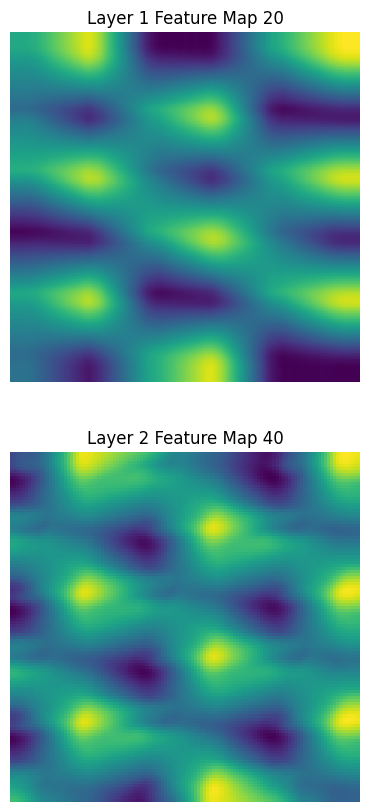

In [25]:
def visualize_feature_maps(model, image):
    model.eval()
    with torch.no_grad():
        x = image.unsqueeze(0).to(device)  # Add batch dimension and move to device
        feature_maps = []
        hooks = []
        
        def hook_fn(module, input, output):
            feature_maps.append(output.cpu())
        
        # Register hooks
        for layer_name in ['conv1', 'conv2']:
            hooks.append(model.track_layers[layer_name].register_forward_hook(hook_fn))
        
        _ = model(x)  # Forward pass to activate hooks
        
        # Remove hooks
        for hook in hooks:
            hook.remove()
        
        # Plot feature maps
        num_layers = len(feature_maps)
        fig, axes = plt.subplots(num_layers, 1, figsize=(15, 5 * num_layers))
        for i, fmap in enumerate(feature_maps):
            fmap = fmap[0]  # Remove batch dimension
            num_features = fmap.size(0)
            for j in range(num_features):
                ax = axes[i] if num_layers > 1 else axes
                ax.imshow(fmap[j].numpy(), cmap='viridis')
                ax.axis('off')
                ax.set_title(f'Layer {i+1} Feature Map {j+1}')
        plt.show()

# Example usage with a sample image
sample_image, _ = train_dataset[0]
visualize_feature_maps(global_net, sample_image)

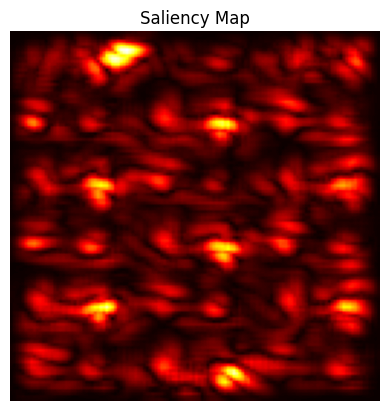

In [26]:
def compute_saliency_map(model, image, label):
    model.eval()
    image = image.unsqueeze(0).to(device)  # Add batch dimension
    image.requires_grad_()
    label = torch.tensor([label]).to(device)
    
    output = model(image)
    loss = F.cross_entropy(output, label)
    model.zero_grad()
    loss.backward()
    
    saliency, _ = torch.max(image.grad.data.abs(), dim=1)
    return saliency[0].cpu().numpy()

# Example usage with a sample image and label
sample_image, sample_label = train_dataset[0]
saliency_map = compute_saliency_map(global_net, sample_image, sample_label)

plt.imshow(saliency_map, cmap='hot')
plt.axis('off')
plt.title('Saliency Map')
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

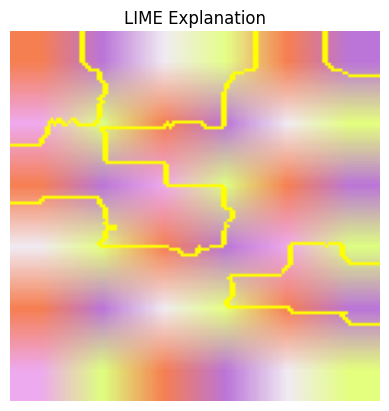

In [27]:
def lime_explanation(model, image, label):
    def predict_fn(images):
        images = torch.stack([transforms.ToTensor()(img) for img in images]).to(device)
        with torch.no_grad():
            outputs = model(images)
        return F.softmax(outputs, dim=1).cpu().numpy()

    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(image.numpy().transpose(1, 2, 0), predict_fn, top_labels=10, hide_color=0, num_samples=1000)
    
    temp, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=5, hide_rest=False)
    plt.imshow(mark_boundaries(temp, mask))
    plt.axis('off')
    plt.title('LIME Explanation')
    plt.show()

# Example usage with a sample image and label
sample_image, sample_label = train_dataset[0]
lime_explanation(global_net, sample_image, sample_label)

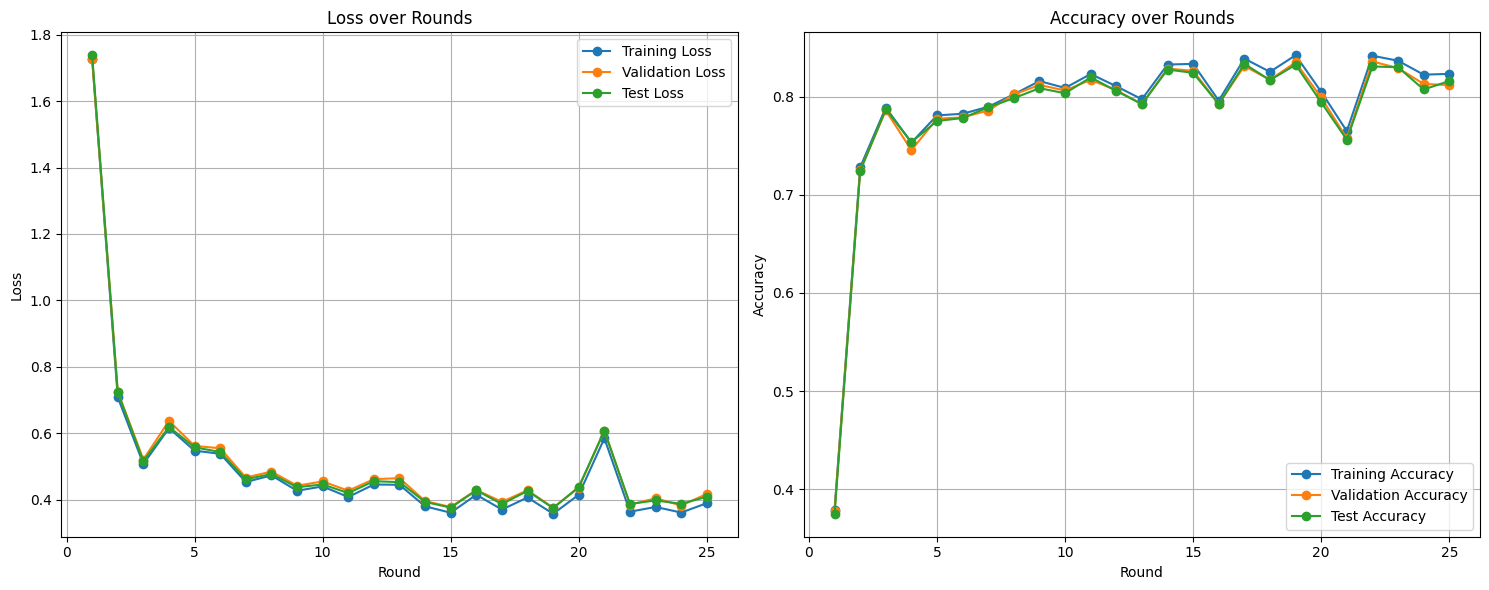

In [30]:
# After the federated learning rounds
def plot_history(history):
    rounds = [entry['round'] for entry in history]
    train_losses = [entry['train_loss'] for entry in history]
    train_accs = [entry['train_acc'] for entry in history]
    dev_losses = [entry['dev_loss'] for entry in history]
    dev_accs = [entry['dev_acc'] for entry in history]
    test_losses = [entry['test_loss'] for entry in history]
    test_accs = [entry['test_acc'] for entry in history]
    
    plt.figure(figsize=(15, 6))
    
    # Plot Losses
    plt.subplot(1, 2, 1)
    plt.plot(rounds, train_losses, marker='o', label='Training Loss')
    plt.plot(rounds, dev_losses, marker='o', label='Validation Loss')
    plt.plot(rounds, test_losses, marker='o', label='Test Loss')
    plt.xlabel('Round')
    plt.ylabel('Loss')
    plt.title('Loss over Rounds')
    plt.legend()
    plt.grid(True)

    # Plot Accuracies
    plt.subplot(1, 2, 2)
    plt.plot(rounds, train_accs, marker='o', label='Training Accuracy')
    plt.plot(rounds, dev_accs, marker='o', label='Validation Accuracy')
    plt.plot(rounds, test_accs, marker='o', label='Test Accuracy')
    plt.xlabel('Round')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Rounds')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function to plot the history
plot_history(history)